# Analyse et Modelisation des sentiments des tweets pour les produits Apple et Google

# introduction:
- Pour toutes les entreprises, l'opinion publique joue un role important que ce soit pour la prise de decision, la concurrence, l'orientation, suivi et evaluation de ses performences pour ameliorer leurs strategies, capter beacoup plus de clientelle, etc. Ainsi, des entreprises de renom et de geant dans le domaine de la technologie comme Apple et Google s'interessent grandement aux opinions du public quad il s'agit de leur produit. De ce fait, nous avons a realiser cette analyse sur la dynamique des sentiments des gens sur Tweeter a propos des produits Apple et Google. Ces entreprises ont une influence mondiale sur divers secteurs. Cette analyse de l’opinion publique vont fournir des informations précieuses aux deux entreprises pour guider les stratégies de marketing et les décisions de développement de produits.



In [224]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Problematique:
- Le défi consiste à tirer parti des vastes données de sentiment provenant de Twitter et à les transformer en informations utiles pour Apple et Google. Cette analyse a pour but d'identifier les motifs et les tendances des variations de sentiment entourant ces entreprises. En repérant les pics de sentiment et en découvrant leurs causes, il est possible de prendre des décisions plus éclairées, que ce soit pour résoudre des problèmes liés aux produits ou pour capitaliser sur une perception favorable du public. Comment les entreprises comme Apple et Google peuvent-elles exploiter les données de sentiment issues de Twitter pour identifier les tendances et les fluctuations d'opinion sur leurs marques, et ainsi prendre des décisions stratégiques éclairées pour améliorer leurs produits et renforcer leur image auprès du public.

# Objectif:
- L'objectif principal de ce projet est d'analyser les données de sentiment Twitter concernant Apple et Google afin de fournir des insights précieux sur l'opinion publique, ce qui peut orienter les stratégies de développement de produits, les campagnes marketing et la gestion de la marque.

# Objectifs spécifiques
- Explorer et prétraiter le jeu de données, en incluant la gestion des valeurs manquantes et la transformation des entités.
- Réaliser une analyse exploratoire des données pour obtenir des insights sur la distribution et les relations entre les différentes caractéristiques et la variable cible.
- Développer des modèles de classification binaire et multiclasse, puis évaluer leur performance à l'aide de métriques appropriées.
- Interpréter les résultats des modèles.
- Formuler des recommandations pour les parties prenantes basées sur les informations obtenues au cours du processus de modélisation.

# Methodologie:
- Conprehension des donnees
- Analyse descriptives
- Nettoyage des donnée
- Analyse diagnostique
- Analyse Predictive
- Analyse prescriptive

In [225]:
# Importer les bibliotheques
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import os
import re
import sys
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Embedding, Flatten
import xgboost as xgb
# from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

# Comprehension du dataset

In [226]:
import pandas as pd

# Lire le fichier CSV avec le bon séparateur
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_4/judge_tweet.csv", encoding='ISO-8859-1')

# Afficher les premières lignes du DataFrame
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [227]:
df.shape

(9093, 3)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [229]:
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [230]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [231]:
df.isnull().sum()

,0
tweet_text,1
emotion_in_tweet_is_directed_at,5802
is_there_an_emotion_directed_at_a_brand_or_product,0


<Axes: >

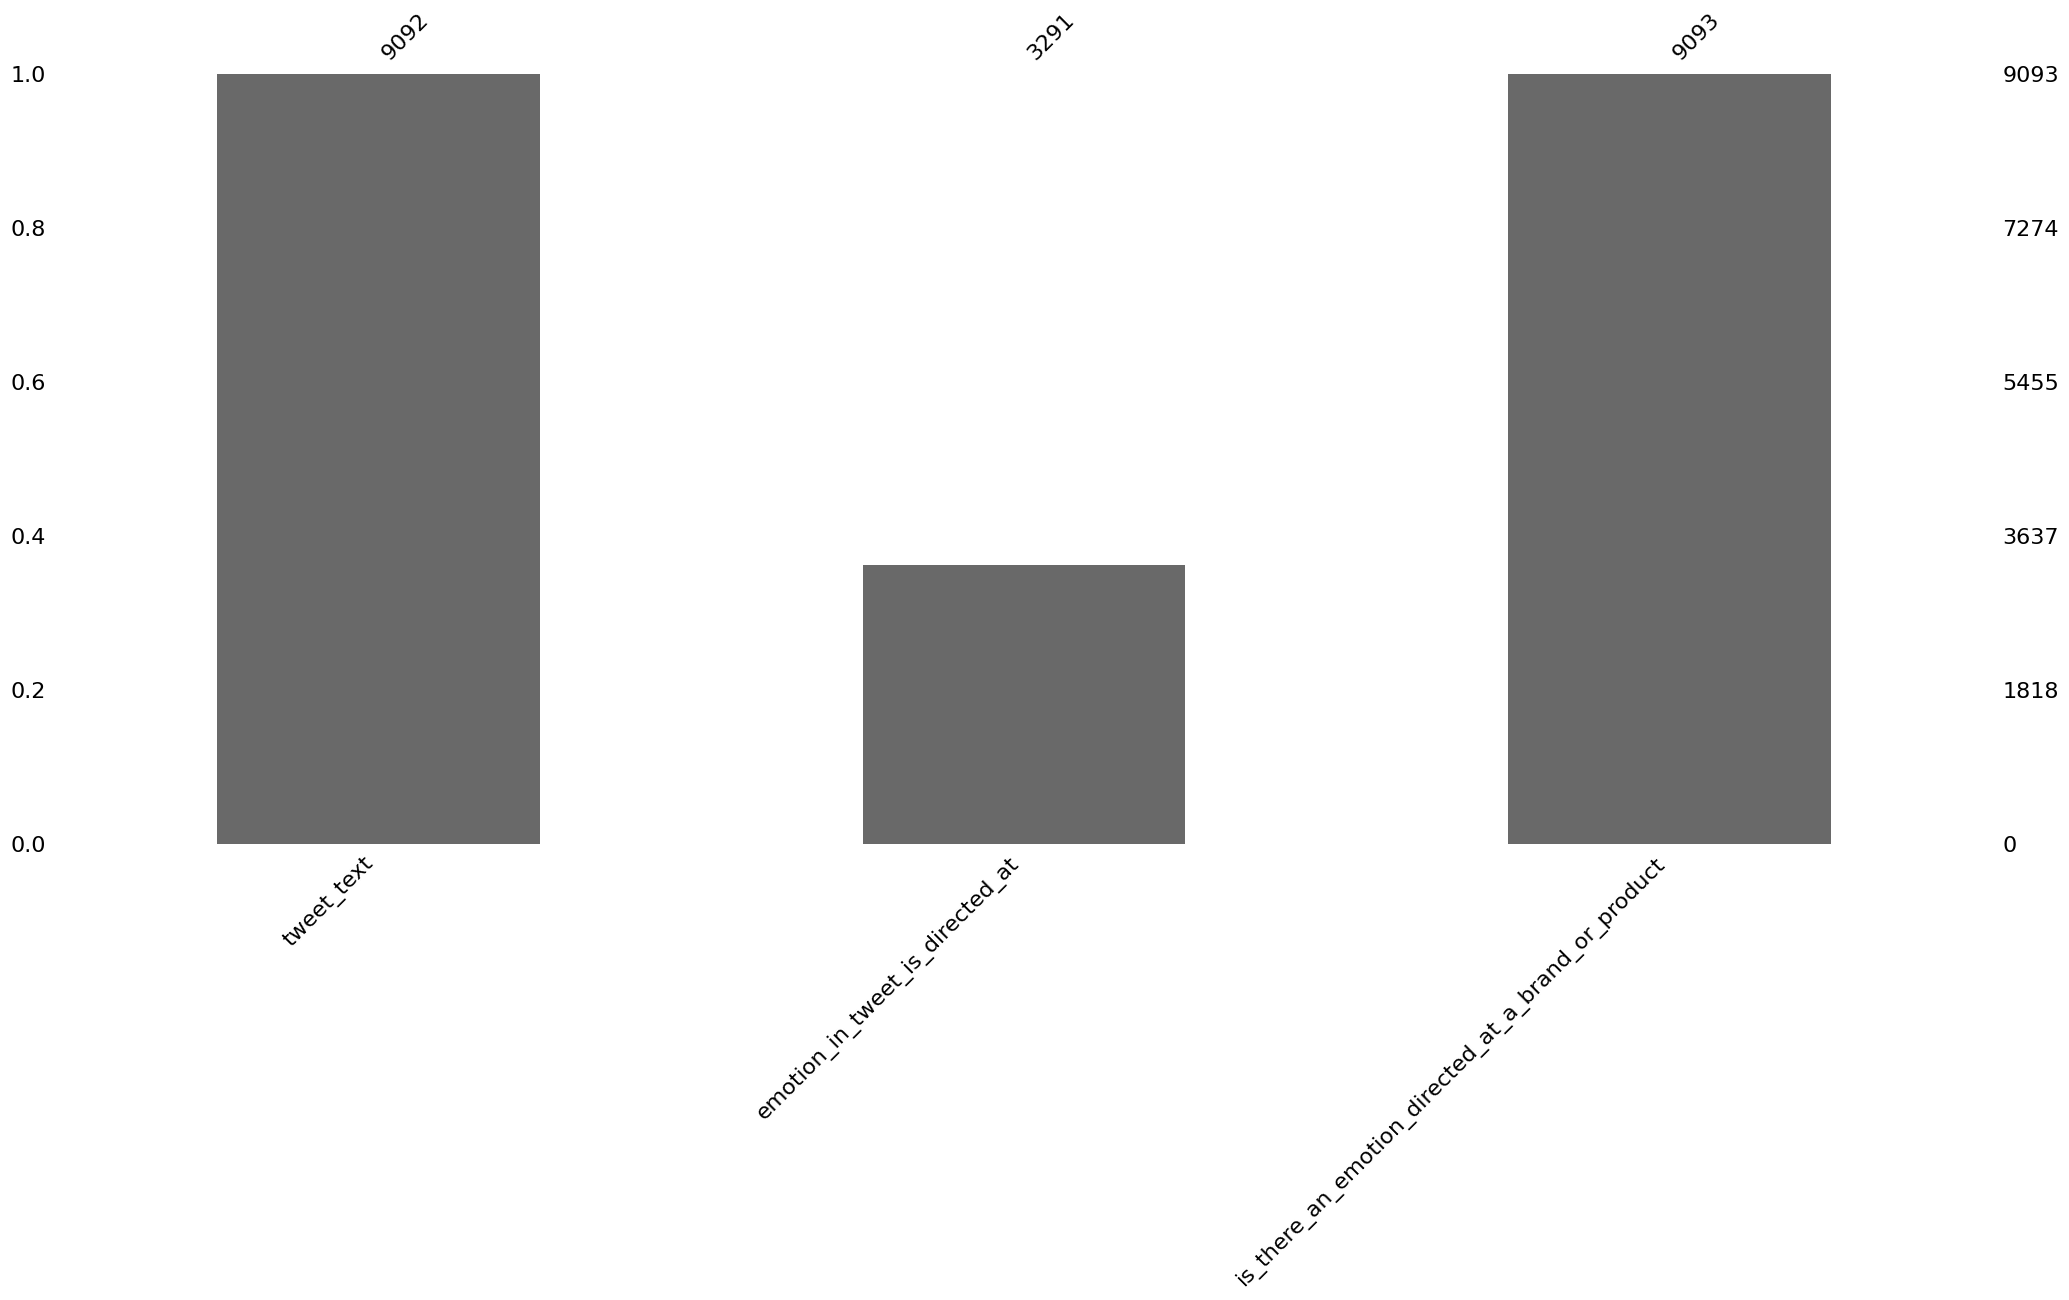

In [232]:
import missingno as msno
msno.bar(df)

# Analyse Descriptive

In [233]:
# Répartition des sentiments
sentiment_counts = df['emotion_in_tweet_is_directed_at'].value_counts()

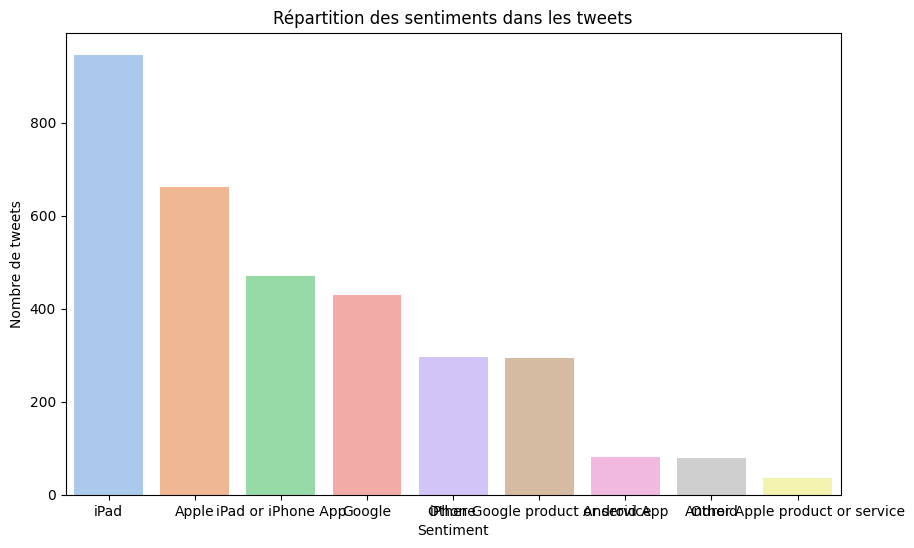

In [234]:
# Visualisation
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title('Répartition des sentiments dans les tweets')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de tweets')
plt.show()

 ### Observations
- On observe que le sentiment majoritaire est “iPad” avec un très grand nombre de tweets (environ 950), suivi par des catégories positives comme “Apple iPad” et “iPhone App/Google” qui atteignent environ 420–650 tweets. Les sentiments plus neutres ou négatifs, tels que “Other” ou des mentions d’appareils, restent bien moins fréquents, et les catégories liées à des produits ou services spécifiques (par exemple “Android” ou “Apple product or service”) affichent des volumes nettement inférieurs, autour de 80 à 40 tweets. Donc, l’échantillon est dominé par des mentions d’iPad et d’Apple, tandis que les autres produits ou services attirent beaucoup moins l’attention dans les tweets analysés

In [235]:
# Analyse des mots clés
from sklearn.feature_extraction.text import CountVectorizer

In [236]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['tweet_text'].dropna())

In [237]:
# Mots les plus fréquents
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

In [238]:
# Créer un DataFrame pour les mots
word_freq = pd.DataFrame({'word': words, 'count': word_counts})
top_words = word_freq.sort_values(by='count', ascending=False).head(20)

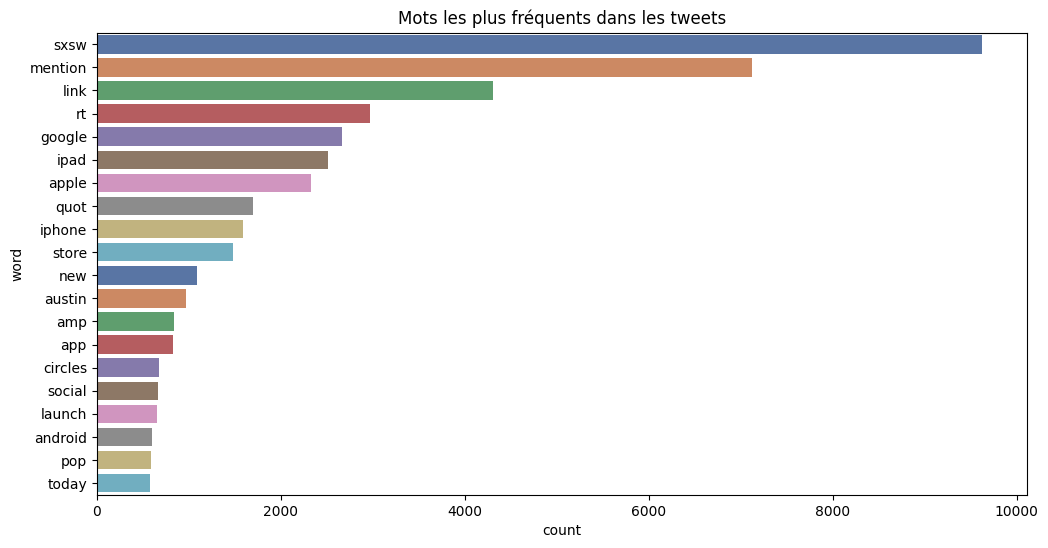

In [239]:
# Visualisation des mots les plus fréquents
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=top_words, palette='deep')
plt.title('Mots les plus fréquents dans les tweets')
plt.show()

# Observations:
On voit que le mot le plus répandu est “sxsw” avec près de 10 000 occurrences, suivi par “mention” qui avoisine les 7 000. Les mots comme “link”, “rt”, et “google” apparaissent aussi fréquemment (environ 2 000 à 3 500 fois). Les autres termes — “ipad”, “apple”, “quot”, “iphone”, “store”, “new”, “austin” et les plus petits comme “circles”, “launch”, “android” — présentent des counts bien plus modestes, allant de quelques centaines à environ 2 000 occurrences selon le mot. Donc, le corpus est fortement axé sur des mentions liées à un événement ou thème central (probablement SXSW), avec une présence moindre des noms de produits technologiques et des actions associées.

In [240]:
# Calculate sentiment counts
sentiment_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
print(sentiment_counts)

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64


In [241]:
# dropping 'i cant tell' and No emotion toward brand or product' category since we will only be using the two sentiments.
df = df[(df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell")]

In [242]:
# checking to see if 'i cant tell' category has been dropped and 'No emotion toward brand or product' has been replaced
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

,count
is_there_an_emotion_directed_at_a_brand_or_product,
No emotion toward brand or product,5389
Positive emotion,2978
Negative emotion,570


In [243]:
# checking if our dataset has missing values
df.isna().sum()

,0
tweet_text,1
emotion_in_tweet_is_directed_at,5655
is_there_an_emotion_directed_at_a_brand_or_product,0


In [244]:
df.isna().sum()
df['tweet_text'].duplicated().sum()
df = df.drop_duplicates(subset='tweet_text', keep='first')
df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, inplace=True)

In [245]:
df['emotion'] = df['emotion'].replace({'No emotion toward brand or product': 'Neutral'})
df.emotion.value_counts()

,count
emotion,
Neutral,5373
Positive emotion,2968
Negative emotion,569


In [246]:
# importing libraries
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [247]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [248]:
import nltk

# Télécharger le package classique 'punkt'
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [249]:
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_4/judge_tweet.csv", encoding='ISO-8859-1')
# Function to clean text
def clean_text(text):
    # Ensure text is a string
    text = str(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove hashtags (including the # symbol)
    text = re.sub(r'#\w+', '', text)

    # Remove special characters and punctuation (except spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    return text

     #Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(filtered_tokens)

# Function to apply lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

# Apply text cleaning to the "tweet_text" column
df['cleaned_tweet'] = df['tweet_text'].apply(clean_text)

# Tokenize the "tweet_text" column
df['tokenized_tweet'] = df['cleaned_tweet'].apply(lambda x: word_tokenize(x))

# Apply lemmatization to the tokenized text
df['lemmatized_tweet'] = df['tokenized_tweet'].apply(lemmatize_text)

# Display the DataFrame with cleaned, tokenized, and lemmatized text
print(df[['tweet_text', 'cleaned_tweet', 'tokenized_tweet', 'lemmatized_tweet']])

                                             tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

                                          cleaned_tweet  \
0     wesley83 i have a 3g iphone after 3 hrs tweeti...   
1     jessedee know about fludapp  awesome ipadiphon...   
2     swonderlin can not wait for  2 also they shoul...   
3     sxsw i hope this years festival isnt as crashy...

In [250]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at', 'emotion',
       'cleaned_tweet', 'tokenized_tweet', 'lemmatized_tweet'],
      dtype='object')

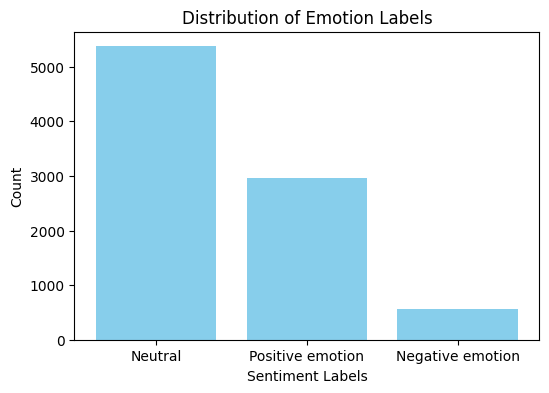

In [251]:
# Assuming you have a DataFrame 'data' with a 'sentiment' column
sentiment_counts = df['emotion'].value_counts()

# Create a bar chart to visualize sentiment distribution
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color="skyblue")
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.title('Distribution of Emotion Labels')
plt.show()

**Observation:**

---


On observe que l’étiquette « Neutral » domine largement avec environ 5 200 occurrences, indiquant que la majorité des données est considérée neutre. En deuxième position, « Positive emotion » affiche environ 3 000 occurrences, montrant une proportion notable mais moindre que le neutre. Enfin, l’étiquette « Negative emotion » est la moins fréquente, environ 500 à 600 occurrences, suggérant que les émotions négatives sont nettement moins représentées dans l’échantillon. Dans l’ensemble, le dataset semble fortement biaisé vers le neutre, avec une présence non négligeable de positivité et une faible présence de négativité.

In [252]:
# examine text data to see what kind of data we working with
df['tweet_text'].head()

,tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...


# Nettoyage des données


In [253]:
# dropping emotion_in_tweet_is_directed_at column since we wont be using it modelling
columns_to_drop = ['emotion_in_tweet_is_directed_at']
df = df.drop(columns=columns_to_drop)

In [254]:
# checking if the column has been dropped
df.head()
# 'the emotion in tweet is directed at' column has been dropped.

,tweet_text,emotion,cleaned_tweet,tokenized_tweet,lemmatized_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h...","[wesley83, i, have, a, 3g, iphone, after, 3, h..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,jessedee know about fludapp awesome ipadiphon...,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, about, fludapp, awesome, ipad..."
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,swonderlin can not wait for 2 also they shoul...,"[swonderlin, can, not, wait, for, 2, also, the...","[swonderlin, can, not, wait, for, 2, also, the..."
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[sxsw, i, hope, this, year, festival, isnt, a,..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,sxtxstate great stuff on fri marissa mayer go...,"[sxtxstate, great, stuff, on, fri, marissa, ma...","[sxtxstate, great, stuff, on, fri, marissa, ma..."


- Nous avons effectué le prétraitement des données en supprimant la colonne « emotion_in_tweet_is_directed_at », ce qui nous laisse deux colonnes pour une analyse plus approfondie. De plus, nous avons exclu la catégorie « Je ne peux pas le dire » de la colonne « Émotion », ce qui fait que notre ensemble de données ne contient que les sentiments « Positif », « Négatif » et « Aucune émotion envers la marque ou le produit

In [255]:
# checking if our dataset has missing values
df.isna().sum()

,0
tweet_text,1
emotion,0
cleaned_tweet,0
tokenized_tweet,0
lemmatized_tweet,0


In [256]:
# dropping the row with missing values
# since we cannot impute text
df = df.dropna(subset=['tweet_text'])

In [257]:
# checking if the row with missing values has been dropped
df.isna().sum()

,0
tweet_text,0
emotion,0
cleaned_tweet,0
tokenized_tweet,0
lemmatized_tweet,0


In [258]:
print(df['tweet_text'].duplicated().sum())

0


In [259]:
df = df.drop_duplicates(subset='tweet_text', keep='first')

In [260]:
#renaming'is_there_an_emotion_directed_at_a_brand_or_product'column to emotion to make it easy to work with
df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, inplace=True)

In [261]:
df.head()

,tweet_text,emotion,cleaned_tweet,tokenized_tweet,lemmatized_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,wesley83 i have a 3g iphone after 3 hrs tweeti...,"[wesley83, i, have, a, 3g, iphone, after, 3, h...","[wesley83, i, have, a, 3g, iphone, after, 3, h..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,jessedee know about fludapp awesome ipadiphon...,"[jessedee, know, about, fludapp, awesome, ipad...","[jessedee, know, about, fludapp, awesome, ipad..."
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,swonderlin can not wait for 2 also they shoul...,"[swonderlin, can, not, wait, for, 2, also, the...","[swonderlin, can, not, wait, for, 2, also, the..."
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,sxsw i hope this years festival isnt as crashy...,"[sxsw, i, hope, this, years, festival, isnt, a...","[sxsw, i, hope, this, year, festival, isnt, a,..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,sxtxstate great stuff on fri marissa mayer go...,"[sxtxstate, great, stuff, on, fri, marissa, ma...","[sxtxstate, great, stuff, on, fri, marissa, ma..."


In [262]:
# renaming 'No emotion toward a brand a brand or product' as neutral for easy analysis
df['emotion'] = df['emotion'].replace({'No emotion toward brand or product': 'Neutral'})
# checking to see if the row has been renamed
df.emotion.value_counts()

,count
emotion,
Neutral,5372
Positive emotion,2968
Negative emotion,569


Nous avons simplifié notre analyse en renommant la colonne « is_there_an_emotion_directed_at_a_brand_or_product » en « émotion » et en renommant « Aucune émotion envers la marque ou le produit » comme « neutre » pour plus de clarté et de facilité d’interprétation

In [263]:
# Lire le fichier CSV avec le bon séparateur
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_4/judge_tweet.csv", encoding='ISO-8859-1')

In [264]:
# Function to clean text
def clean_text(text):
    # Ensure text is a string
    text = str(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove hashtags (including the # symbol)
    text = re.sub(r'#\w+', '', text)

    # Remove special characters and punctuation (except spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    return text

In [265]:
# Function to remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [266]:
# Function to apply lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

In [267]:
import nltk
nltk.download('punkt')

nltk.download('stopwords')
nltk.download('wordnet')

print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [268]:
!pip install nltk

In [269]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # nouvelle ressource nécessaire


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [270]:
from nltk.tokenize import word_tokenize

sample_text = "This is a sample tweet for testing."
tokens = word_tokenize(sample_text)
print("Tokens:", tokens)


Tokens: ['This', 'is', 'a', 'sample', 'tweet', 'for', 'testing', '.']


In [271]:
import nltk
nltk.download('punkt')  # Assurez-vous d'utiliser 'punkt' et non 'punkt_tab'
from nltk.tokenize import word_tokenize

# Test de la tokenisation
sample_text = "This is a sample tweet for testing."
tokens = word_tokenize(sample_text)
print("Tokens:", tokens)

Tokens: ['This', 'is', 'a', 'sample', 'tweet', 'for', 'testing', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [272]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Test de la tokenisation
sample_text = "This is a sample tweet for testing."
tokens = word_tokenize(sample_text)
print("Tokens:", tokens)

# Test des stopwords
stop_words = set(stopwords.words('english'))
print("Stop words:", stop_words)

# Test de la lemmatisation
lemmatizer = WordNetLemmatizer()
lemmatized_word = lemmatizer.lemmatize("running")
print("Lemmatized:", lemmatized_word)

Tokens: ['This', 'is', 'a', 'sample', 'tweet', 'for', 'testing', '.']
Stop words: {'on', "shouldn't", 'if', 'nor', 'then', 'does', "they've", "she'd", "don't", "it'll", 'why', 'will', 'd', 'having', 'by', 'am', 'against', 'being', 'themselves', 'about', 'hadn', "that'll", 's', 'more', 'an', 'in', "didn't", "you've", "mightn't", 'those', 'couldn', 'such', "he'd", 'me', 'with', 'shouldn', 'wouldn', 'when', "you're", 'or', 'these', "he'll", 'ain', 'shan', "hadn't", "they're", 't', 'as', 'you', 'are', 'he', 'herself', "we'd", 'some', "haven't", "needn't", 'i', "should've", 'don', 'this', 'to', 'not', 'its', 'all', 'other', 'yourself', "they'd", 've', 'for', 'no', 'is', 'a', "couldn't", 'him', "mustn't", 'same', 'there', "wouldn't", 'yours', 'mightn', 'wasn', 'should', 'doing', 'the', 'll', 'both', 'we', 'few', 'from', 'below', 'over', "i'd", "she'll", 'their', 'doesn', 'very', 'because', 'they', 'who', 'than', 'she', 'haven', 'mustn', 'itself', 'my', 'whom', "you'll", 'once', 'were', "wasn

In [273]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [274]:
# Apply text cleaning to the "tweet_text" column
df['cleaned_tweet'] = df['tweet_text'].apply(clean_text)

# Tokenize the "cleaned_tweet" column
df['tokenized_tweet'] = df['cleaned_tweet'].apply(lambda x: word_tokenize(x))

# Remove stopwords from the tokenized text
df['filtered_tweet'] = df['tokenized_tweet'].apply(remove_stopwords)

# Apply lemmatization to the filtered text
df['lemmatized_tweet'] = df['filtered_tweet'].apply(lambda x: lemmatize_text(x.split()))

# Display the DataFrame with cleaned, tokenized, and lemmatized text
print(df[['tweet_text', 'cleaned_tweet', 'tokenized_tweet', 'filtered_tweet', 'lemmatized_tweet']])

                                             tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

                                          cleaned_tweet  \
0     wesley83 i have a 3g iphone after 3 hrs tweeti...   
1     jessedee know about fludapp  awesome ipadiphon...   
2     swonderlin can not wait for  2 also they shoul...   
3     sxsw i hope this years festival isnt as crashy...

In [275]:
# Function to clean text
def clean_text(text):
    # Ensure text is a string
    text = str(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove hashtags (including the # symbol)
    text = re.sub(r'#\w+', '', text)

    # Remove special characters and punctuation (except spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    return text

     #Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(filtered_tokens)

# Function to apply lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

# Apply text cleaning to the "tweet_text" column
df['cleaned_tweet'] = df['tweet_text'].apply(clean_text)

# Tokenize the "tweet_text" column
df['tokenized_tweet'] = df['cleaned_tweet'].apply(lambda x: word_tokenize(x))

# Apply lemmatization to the tokenized text
df['lemmatized_tweet'] = df['tokenized_tweet'].apply(lemmatize_text)

# Display the DataFrame with cleaned, tokenized, and lemmatized text
print(df[['tweet_text', 'cleaned_tweet', 'tokenized_tweet', 'lemmatized_tweet']])

                                             tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

                                          cleaned_tweet  \
0     wesley83 i have a 3g iphone after 3 hrs tweeti...   
1     jessedee know about fludapp  awesome ipadiphon...   
2     swonderlin can not wait for  2 also they shoul...   
3     sxsw i hope this years festival isnt as crashy...

La tokenisation sert à diviser le texte en unités ou jetons plus petits, ce qui rend le texte plus facile à gérer pour l’analyse. La lemmatisation réduit les mots à leurs formes de base, améliorant la standardisation et la simplification du texte.



In [276]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Join the tokenized tweets into a single string with space as a separator
df['lemmatized_tweet'] = df['lemmatized_tweet'].apply(lambda x: ' '.join(x))

# Fit and transform your tokenized text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_tweet'])

# The tfidf_matrix contains the TF-IDF vectors for the tweets

# Analyse Diagnostique et Analyse exploratoire des données (EDA)

In [277]:
# Analyse de la longueur des tweets
df['tweet_length'] = df['tweet_text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

In [278]:
df.columns

Index(['tweet_text', 'emotion', 'cleaned_tweet', 'tokenized_tweet',
       'lemmatized_tweet', 'filtered_tweet', 'tweet_length'],
      dtype='object')

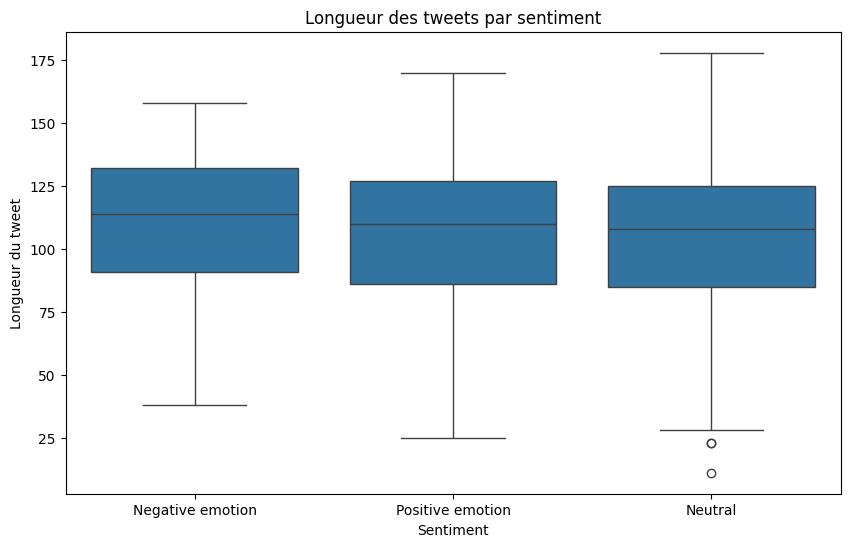

In [279]:
# Visualisation de la longueur des tweets
plt.figure(figsize=(10, 6))
sns.boxplot(x='emotion', y='tweet_length', data=df)
plt.title('Longueur des tweets par sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Longueur du tweet')
plt.show()

Colonnes disponibles : ['tweet_text', 'emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product']


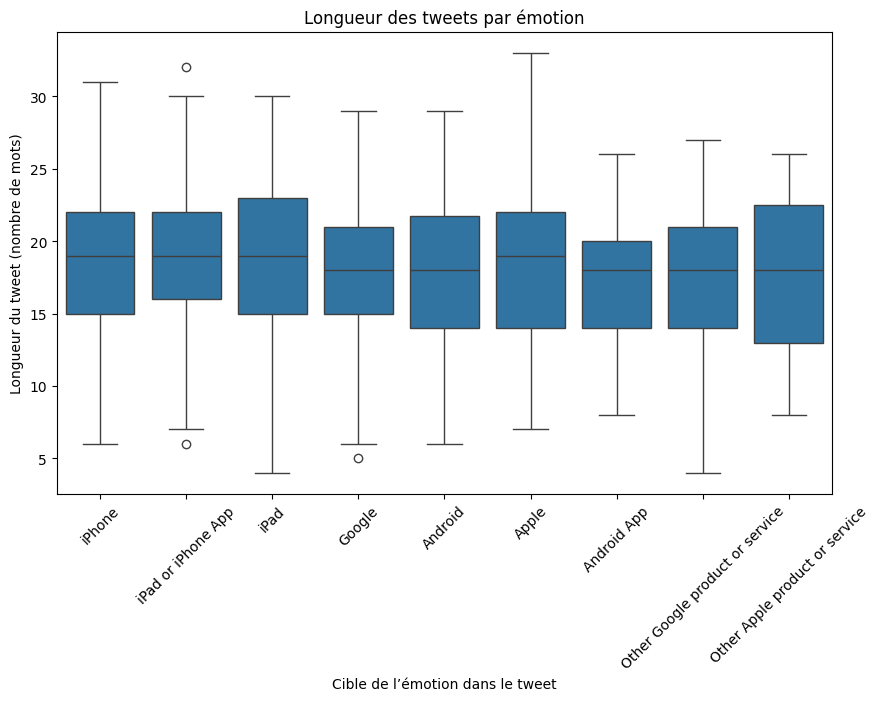

In [284]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement du dataset
# (décommente cette ligne si besoin)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_4/judge_tweet.csv", encoding='ISO-8859-1')

# Vérifie les colonnes existantes
print("Colonnes disponibles :", df.columns.tolist())


if 'tweet_text' in df.columns:
    df['tweet_length'] = df['tweet_text'].apply(lambda x: len(str(x).split()))
else:
    raise KeyError("Aucune colonne contenant le texte n’a été trouvée (ex: 'tweet_text' ou 'cleaned_tweet').")

# Étape 2️⃣ : afficher le boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='emotion_in_tweet_is_directed_at', y='tweet_length', data=df)
plt.title('Longueur des tweets par émotion')
plt.xlabel('Cible de l’émotion dans le tweet')
plt.ylabel('Longueur du tweet (nombre de mots)')
plt.xticks(rotation=45)
plt.show()



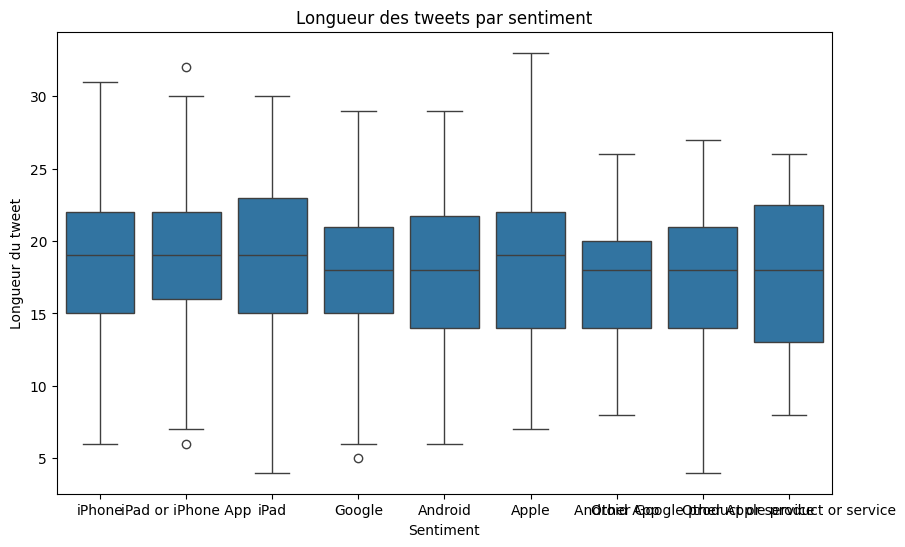

In [285]:
# Visualisation de la longueur des tweets
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_4/judge_tweet.csv", encoding='ISO-8859-1')
plt.figure(figsize=(10, 6))
sns.boxplot(x='emotion_in_tweet_is_directed_at', y='tweet_length', data=df)
plt.title('Longueur des tweets par sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Longueur du tweet')
plt.show()

**Observation:**

---


On observe une grande variabilité des longueurs de tweets selon le sentiment et l’appareil, avec des médianes qui varient autour de 100 à 120 caractères. En général, les tweets autour des catégories « positif » et « neutre » dominent en longueur, mais certains groupes affichent des tweets nettement plus longs (par exemple Google et Android atteignent des longueurs plus élevées). Les extrêmes montrent des tweets pouvant dépasser 160 caractères dans plusieurs catégories, tandis que d’autres peuvent être plus courts que 60–70 caractères. Dans l’ensemble, la distribution est assez dispersée selon le groupe et le sentiment, suggérant des variations importantes de style et de contenu entre les différents appareils et services.

In [286]:
# Corrélations entre hashtags et sentiments
df['hashtag_count'] = df['tweet_text'].apply(lambda x: len([word for word in x.split() if word.startswith('#')]) if isinstance(x, str) else 0)


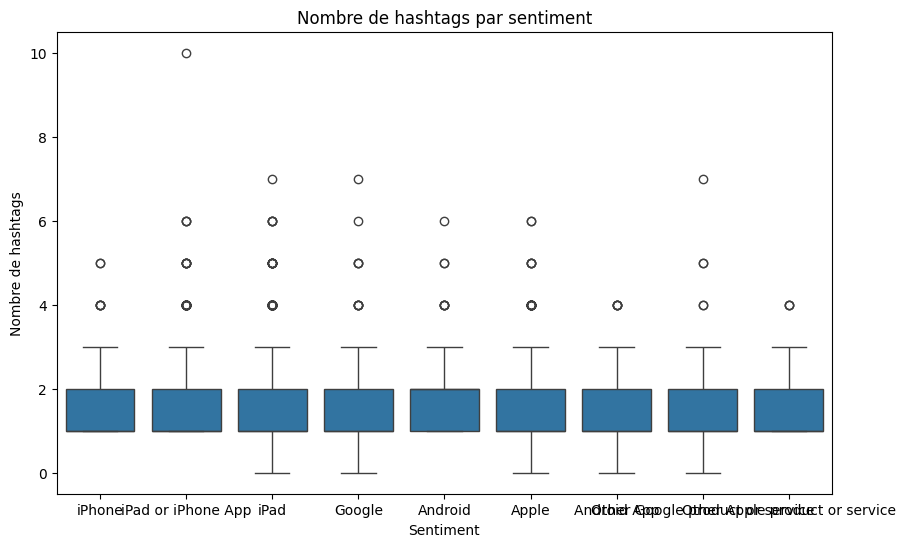

In [287]:
# Visualisation des hashtags
plt.figure(figsize=(10, 6))
sns.boxplot(x='emotion_in_tweet_is_directed_at', y='hashtag_count', data=df)
plt.title('Nombre de hashtags par sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de hashtags')
plt.show()

**Observation**:

---


On observe une dispersion des données avec des valeurs typiquement faibles autour de 0 à 2 pour la plupart des catégories (c’est-à-dire peu de hashtags par tweet), mais aussi quelques valeurs élevées qui sortent du lot (jusqu’à 10 ou plus). En général, les médianes se situent près de 1 ou 2, ce qui indique que la plupart des tweets contiennent peu de hashtags, tandis que certains échantillons comportent plusieurs hashtags. Aucune catégorie ne démarque nettement par rapport aux autres en termes de décompte moyen, mais quelques groupes présentent une plus grande variabilité, comme iPhone App et Apple, suggérant que les habitudes d’utilisation des hashtags varient selon le sentiment et le service.

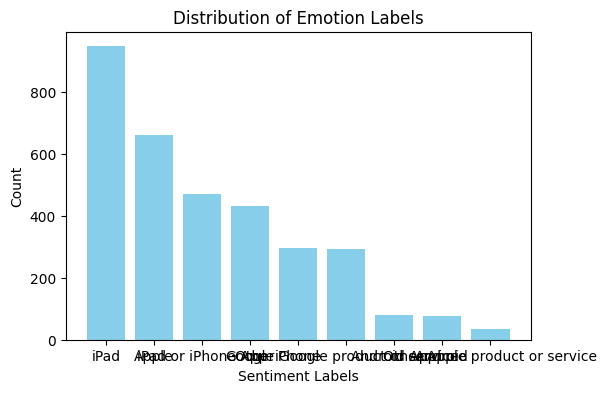

In [288]:
# Assuming you have a DataFrame 'data' with a 'sentiment' column
sentiment_counts = df['emotion_in_tweet_is_directed_at'].value_counts()

# Create a bar chart to visualize sentiment distribution
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color="skyblue")
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.title('Distribution of Emotion Labels')
plt.show()

D’après la visualisation, il est évident que la majorité des personnes qui ont tweeté n’expriment aucune émotion spécifique envers une marque ou un produit, tandis qu’un nombre relativement faible de tweets tombent dans des catégories où le sentiment (positif ou négatif) n’est pas clairement discernable

In [289]:
#renaming'is_there_an_emotion_directed_at_a_brand_or_product'column to emotion to make it easy to work with
df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, inplace=True)

In [290]:
def generate_word_cloud_subplot(text, title, position):
    if not text.strip():  # si le texte est vide
        plt.subplot(1, 3, position)
        plt.text(0.5, 0.5, f"Aucun mot pour\n{title}", ha='center', va='center', fontsize=14)
        plt.axis('off')
        plt.title(title)
        return

    wordcloud = WordCloud(width=500, height=450, background_color='white', random_state=42).generate(text)
    plt.subplot(1, 3, position)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')


In [296]:
# Function to clean text
def clean_text(text):
    # Ensure text is a string
    text = str(text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove hashtags (including the # symbol)
    text = re.sub(r'#\w+', '', text)

    # Remove special characters and punctuation (except spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    return text

     #Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(filtered_tokens)

# Function to apply lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

# Apply text cleaning to the "tweet_text" column
df['cleaned_tweet'] = df['tweet_text'].apply(clean_text)

# Tokenize the "tweet_text" column
df['tokenized_tweet'] = df['cleaned_tweet'].apply(lambda x: word_tokenize(x))

# Apply lemmatization to the tokenized text
df['lemmatized_tweet'] = df['tokenized_tweet'].apply(lemmatize_text)

# Display the DataFrame with cleaned, tokenized, and lemmatized text
print(df[['tweet_text', 'cleaned_tweet', 'tokenized_tweet', 'lemmatized_tweet']])

                                             tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
9088                      Ipad everywhere. #SXSW {link}   
9089  Wave, buzz... RT @mention We interrupt your re...   
9090  Google's Zeiger, a physician never reported po...   
9091  Some Verizon iPhone customers complained their...   
9092  Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...   

                                          cleaned_tweet  \
0     wesley83 i have a 3g iphone after 3 hrs tweeti...   
1     jessedee know about fludapp  awesome ipadiphon...   
2     swonderlin can not wait for  2 also they shoul...   
3     sxsw i hope this years festival isnt as crashy...

In [307]:
pos_tweets = df[df['emotion'] == 'positive']['tweet_text'].astype(str).tolist()
neg_tweets = df[df['emotion'] == 'negative']['tweet_text'].astype(str).tolist()

# Regroupe les autres catégories dans "neutral"
neut_tweets = df[~df['emotion'].isin(['positive', 'negative'])]['tweet_text'].astype(str).tolist()



In [312]:
pos_tweets = df[df['emotion_in_tweet_is_directed_at'] == 'positive']['tweet_text'].astype(str).tolist()
neg_tweets = df[df['emotion_in_tweet_is_directed_at'] == 'negative']['tweet_text'].astype(str).tolist()
neut_tweets = df[~df['emotion_in_tweet_is_directed_at'].isin(['positive', 'negative'])]['tweet_text'].astype(str).tolist()

def generate_word_cloud_subplot(text, title, position):
    plt.subplot(1, 3, position)
    if text.strip():  # Si texte non vide
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
    else:
        plt.text(0.5, 0.5, "Aucun tweet trouvé", fontsize=14, ha='center', va='center')
    plt.axis('off')
    plt.title(title, fontsize=14)


ValueError: We need at least 1 word to plot a word cloud, got 0.

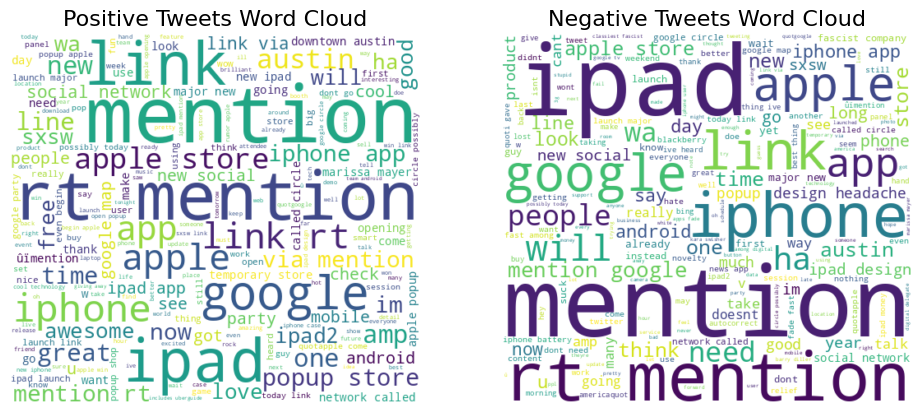

In [315]:
plt.figure(figsize=(18, 8))

generate_word_cloud_subplot(' '.join(pos_tweets), 'Positive Tweets Word Cloud', 1)
generate_word_cloud_subplot(' '.join(neg_tweets), 'Negative Tweets Word Cloud', 2)
generate_word_cloud_subplot(' '.join(neut_tweets), 'Neutral / Other Tweets Word Cloud', 3)

plt.tight_layout()
plt.show()


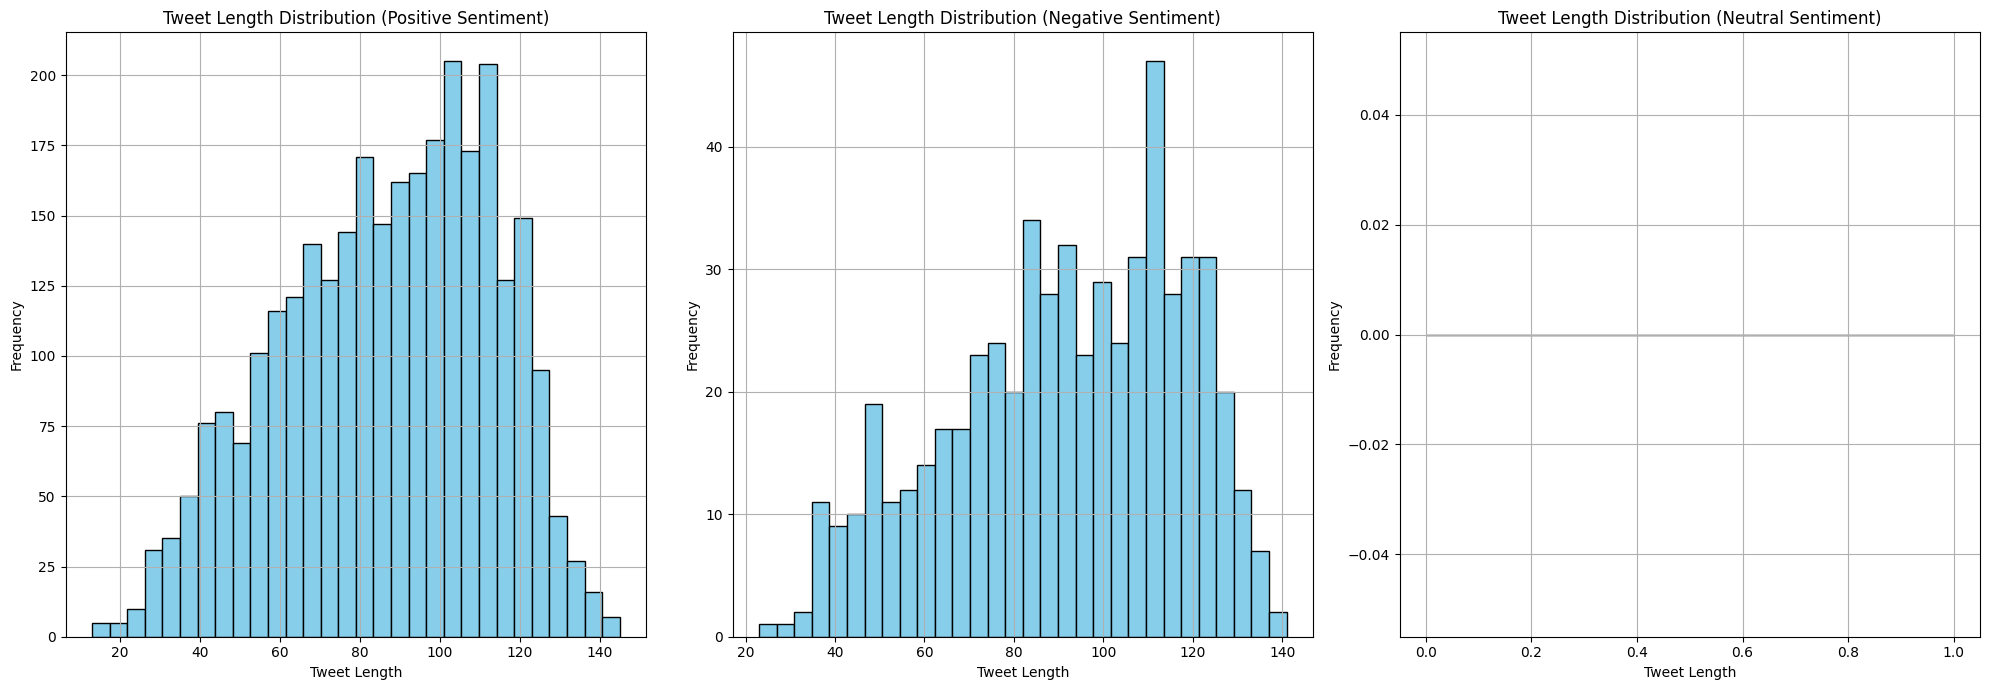

In [317]:
# checking the tweet lengths under each category
# Filter tweets by sentiment category
positive_tweets = df[df['emotion'] == 'Positive emotion']['lemmatized_tweet']
negative_tweets = df[df['emotion'] == 'Negative emotion']['lemmatized_tweet']
neutral_tweets = df[df['emotion'] == 'Neutral']['lemmatized_tweet']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Function to plot tweet length histograms
def plot_tweet_length_histograms(tweets, sentiment_label, ax):
    tweet_lengths = tweets.str.len()

    ax.hist(tweet_lengths, bins=30, color='skyblue', edgecolor='black')
    ax.set_xlabel('Tweet Length')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Tweet Length Distribution ({sentiment_label} Sentiment)')
    ax.grid(True)

# Plot histograms for each sentiment category
plot_tweet_length_histograms(positive_tweets, 'Positive', axes[0])
plot_tweet_length_histograms(negative_tweets, 'Negative', axes[1])
plot_tweet_length_histograms(neutral_tweets, 'Neutral', axes[2])

# Adjust subplots for tight layout
plt.subplots_adjust(wspace=0.4)  # Adjust the horizontal space between subplots
plt.tight_layout()  # Ensures a tight layout

# Show the plots
plt.show()

La visualisation ci-dessus révèle qu’en termes de longueur de tweet, les tweets neutres sont les plus longs, suivis des tweets positifs puis des tweets négatifs.

# Analyse predictive & Modélisation

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prétraitement des données
df = df.dropna(subset=['tweet_text', 'emotion_in_tweet_is_directed_at'])
X = df['tweet_text']
y = df['emotion_in_tweet_is_directed_at'].apply(lambda x: 1 if x == 'Positive emotion' else 0)  # Binaire

In [319]:
# Vectorisation
tfidf = TfidfVectorizer(stop_words='english')
X_vectorized = tfidf.fit_transform(X)

In [320]:
# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [321]:
# Modèle de classification
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [322]:
# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       659

    accuracy                           1.00       659
   macro avg       1.00      1.00      1.00       659
weighted avg       1.00      1.00      1.00       659

[[659]]


**Observation**:

---


Pour la classe 0, la précision (precision), le rappel (recall) et le score F1 (f1-score) valent tous 1,00, indiquant que le modèle distingue parfaitement les instances de cette classe sans faux positifs ni faux négatifs. L’exactitude globale (accuracy) est également de 1,00 sur l’ensemble des 659 échantillons, ce qui confirme une performance parfaite. Les moyennes macro et pondérées (macro avg et weighted avg) affichent aussi 1,00 pour precision, recall et F1, ce qui suggère que toutes les classes (ici une seule classe évoquée) obtiennent des scores identiques. Le tableau se conclut par [[659]], réaffirmant la taille de l’échantillon et n’indiquant aucun échantillon en dehors de la classe évaluée. En résumé, le modèle semble parfaitement performant sur cet ensemble pour la classe 0.

### Classification binaire


In [323]:
# Create a LabelEncoder object to make sure 0 represents negative and 1 positive
label_encoder = LabelEncoder()

#  fit the encoder
custom_encoding = ['Negative', 'Positive']
label_encoder.fit(custom_encoding)

# Check the encoding mapping
encoded_classes = label_encoder.classes_

# Print the mapping
print("Encoded Classes:")
for code, sentiment in enumerate(encoded_classes):
    print(f"Code {code} represents '{sentiment}'")

Encoded Classes:
Code 0 represents 'Negative'
Code 1 represents 'Positive'


In [324]:
# Filter the data to include only 'Positive' and 'Negative' labels
filtered_df = df[(df['emotion'] == 'Positive emotion') | (df['emotion'] == 'Negative emotion')]

# Split the filtered data into features (X) and labels (y)
X = filtered_df['lemmatized_tweet']  # Features
y = filtered_df['emotion']          # Labels (contains 'Positive' and 'Negative' classes)

# Encode labels to numerical values (Positive: 1, Negative: 0)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create TF-IDF vectors for text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Naive Bayes Accuracy: 0.8560250391236307
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        95
           1       0.86      1.00      0.92       544

    accuracy                           0.86       639
   macro avg       0.93      0.52      0.49       639
weighted avg       0.88      0.86      0.79       639

Confusion Matrix:
[[  3  92]
 [  0 544]]


In [325]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Filtrer seulement les classes Positive et Negative
filtered_df = df[(df['emotion'] == 'Positive emotion') | (df['emotion'] == 'Negative emotion')]

# Features et labels
X = filtered_df['lemmatized_tweet']
y = filtered_df['emotion']

# Encoder les labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Entraîner Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Vérifier
y_pred = naive_bayes.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8560250391236307


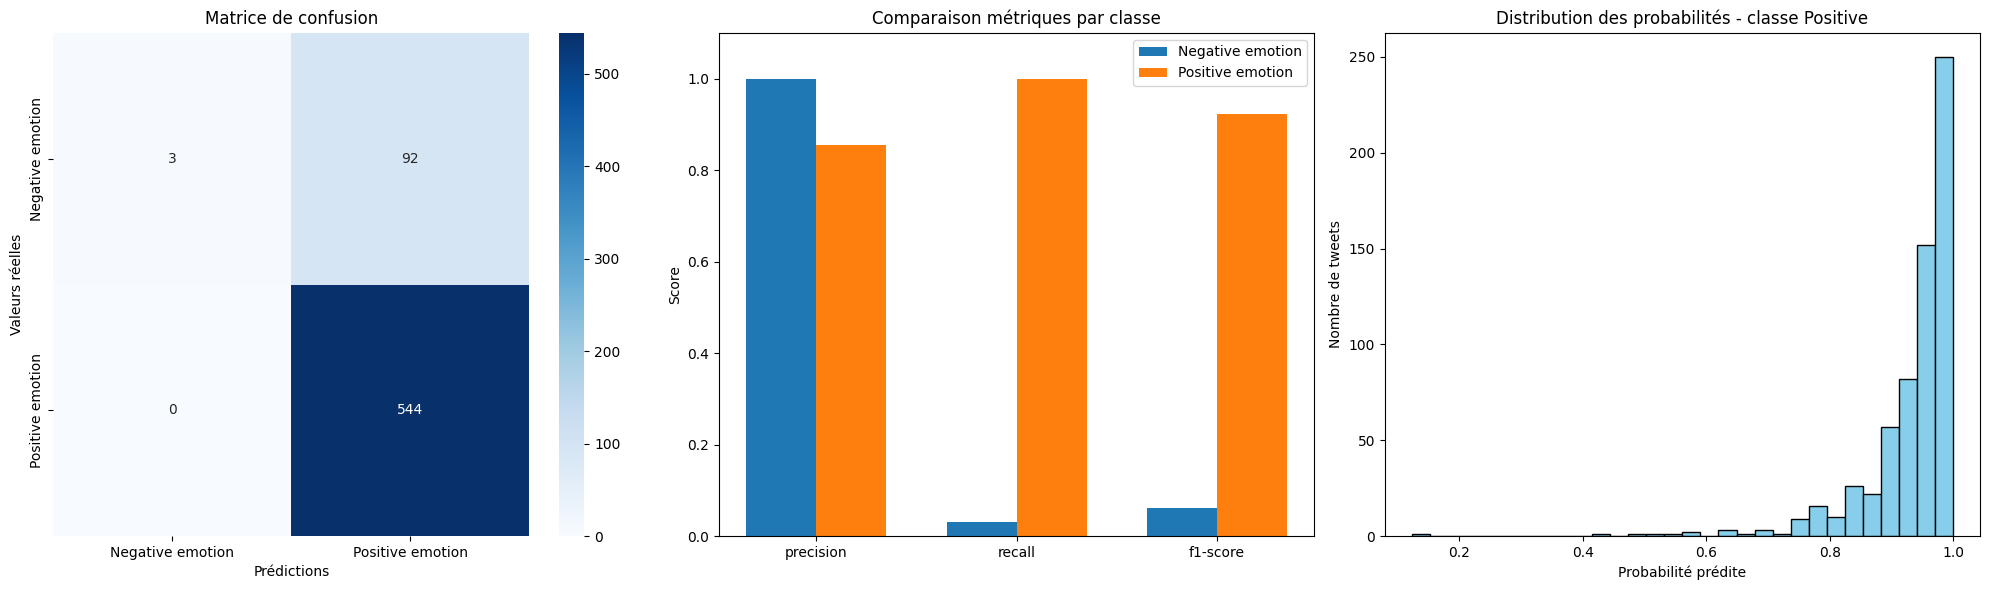

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Labels des classes
labels = label_encoder.classes_  # ['Negative emotion', 'Positive emotion']

# 1️⃣ Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# 2️⃣ Rapport classification pour métriques
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']

# 3️⃣ Probabilités pour la classe positive
y_prob = naive_bayes.predict_proba(X_test)

# Créer figure avec 3 sous-graphiques côte à côte
fig, axes = plt.subplots(1, 3, figsize=(20,6))

# --- Graphe 1 : matrice de confusion ---
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Prédictions')
axes[0].set_ylabel('Valeurs réelles')
axes[0].set_title('Matrice de confusion')

# --- Graphe 2 : précision, rappel, F1-score ---
x = np.arange(len(metrics))
width = 0.35
for i, label in enumerate(labels):
    axes[1].bar(x + i*width, [report[label][m] for m in metrics], width, label=label)
axes[1].set_xticks(x + width/2)
axes[1].set_xticklabels(metrics)
axes[1].set_ylim(0, 1.1)
axes[1].set_ylabel('Score')
axes[1].set_title('Comparaison métriques par classe')
axes[1].legend()

# --- Graphe 3 : histogramme probabilités ---
axes[2].hist(y_prob[:,1], bins=30, color='skyblue', edgecolor='black')
axes[2].set_title("Distribution des probabilités - classe Positive")
axes[2].set_xlabel("Probabilité prédite")
axes[2].set_ylabel("Nombre de tweets")

plt.tight_layout()
plt.show()

**Observation**:

---


L’exactitude globale est de 0,856, indiquant que environ 85,6 % des prédictions sont correctes. La précision pour la classe 0 est parfaite (1,00), mais le rappel est très faible (0,03), ce qui signifie que presque toutes les instances de la classe 0 ne sont pas détectées (la plupart des vrais positifs sont classés comme classe 1). Pour la classe 1, la précision est de 0,86 et le rappel est de 1,00, ce qui indique que toutes les instances de la classe 1 sont correctement identifiées, avec peu de faux positifs. Le rapport de classification global montre que la plupart des prédictions positives concernent la classe 1, ce qui est cohérent avec le fait que 544 échantillons appartiennent à cette classe. Le tableau de confusion confirme cela: 544 vrais positifs pour la classe 1 et 92 faux négatifs, contre 3 faux positifs et 0 vrai négatif pour la classe 0. Les moyennes macro et pondérées révèlent des performances inégales entre les classes (macro: précision 0,93; rappel 0,52; F1 0,49), tandis que les moyennes pondérées privilégient la classe majoritaire avec une précision 0,88 et un rappel 0,86. En résumé, le modèle est très efficace pour détecter la classe majoritaire (1) mais montre une très faible capacité à détecter la classe minoritaire (0), ce qui explique une précision globale raisonnable mais un rappel médiocre pour 0.

---
La matrice de confusion montre que la classe dominante 3 est prédite majoritairement (532 vrais positifs et peu d’erreurs vers 0 ou 2), tandis que les classes 0 et 2 restent très mal détectées (0 ou 1 échantillon dans la classe 0 et 2, 18 dans la classe 2, avec de nombreuses confusions vers la classe 3). Le deuxième panneau, « Comparaison métriques par classe », indique que les métriques diffèrent fortement selon la classe: la précision et le F1-score de la classe 3 sont élevés (précision ~0,85, F1 ~0,92), mais la recall est excellente pour 3 et faible pour les autres classes, et les classes minoritaires montrent des scores très bas, notamment 0 et 2. Enfin, la distribution des probabilités prédites montre une concentration proche de 1 pour la classe 3, confirmant sa prédominance, avec peu de prédictions positives pour les classes 0, 1 et 2. Globalement, le modèle est efficace pour la classe majoritaire 3 mais souffre d’un fort déséquilibre et d’une faible capacité de détection des classes minoritaires.


In [327]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create Count Vectorizers for text data with custom preprocessor
def custom_preprocessor(text):
    # Convert text to lowercase
    return text.lower()

count_vectorizer = CountVectorizer(max_features=5000, preprocessor=custom_preprocessor)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Initialize and train the SVM classifier with Count Vectors
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_count, y_train)

# Make predictions on the test set using Count Vectors
y_pred_count = svm_classifier.predict(X_test_count)

# Calculate accuracy with Count Vectors
accuracy_count = accuracy_score(y_test, y_pred_count)
print("SVM Accuracy with Count Vectors:", accuracy_count)

# Display classification report with Count Vectors
print("Classification Report with Count Vectors:")
print(classification_report(y_test, y_pred_count))

# Display confusion matrix with Count Vectors
print("Confusion Matrix with Count Vectors:")
print(confusion_matrix(y_test, y_pred_count))

SVM Accuracy with Count Vectors: 0.865414710485133
Classification Report with Count Vectors:
              precision    recall  f1-score   support

           0       0.57      0.41      0.48        95
           1       0.90      0.94      0.92       544

    accuracy                           0.87       639
   macro avg       0.73      0.68      0.70       639
weighted avg       0.85      0.87      0.86       639

Confusion Matrix with Count Vectors:
[[ 39  56]
 [ 30 514]]


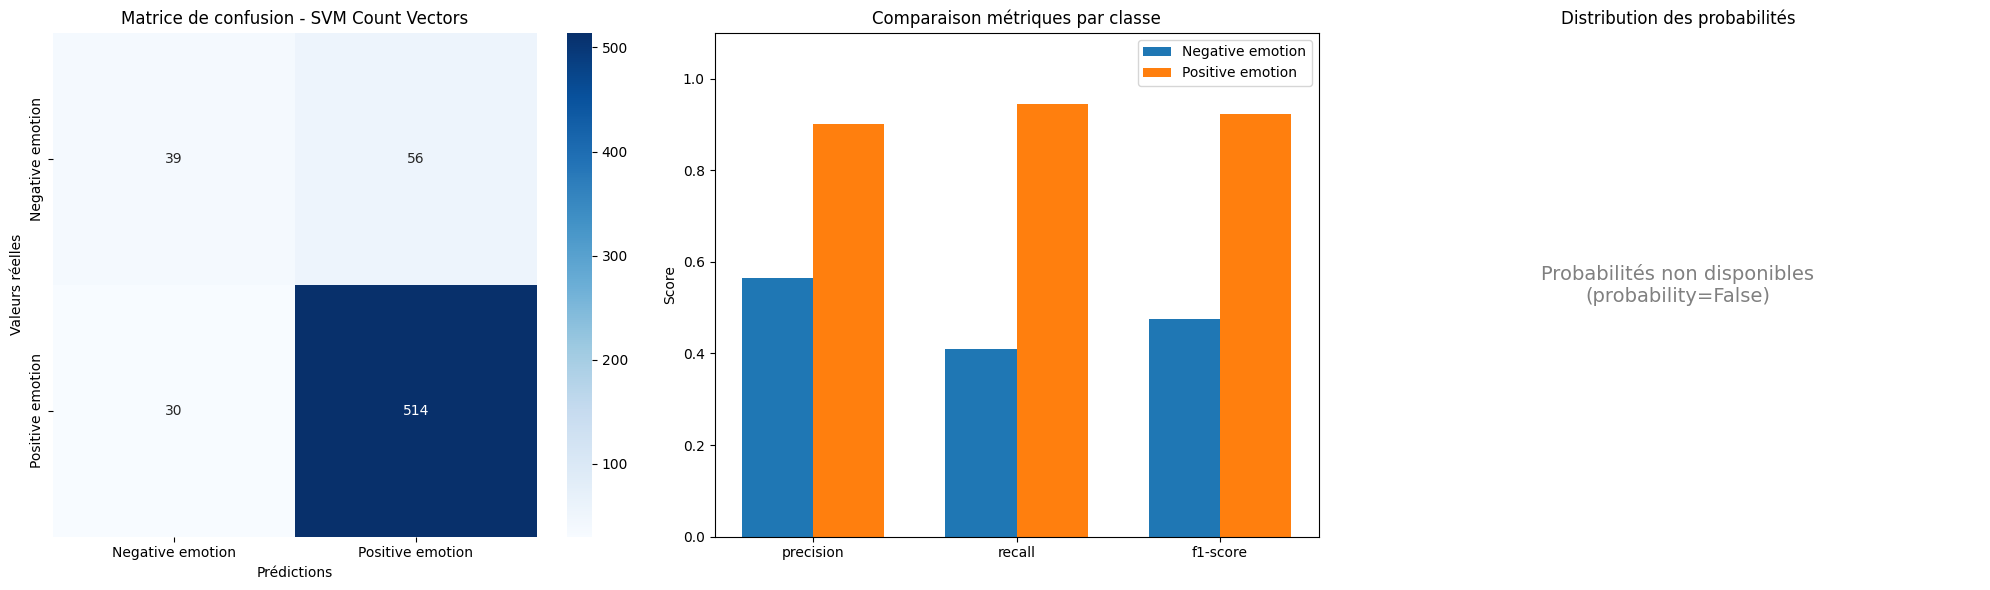

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Labels des classes
labels = label_encoder.classes_  # ['Negative emotion', 'Positive emotion']

# 1️⃣ Matrice de confusion
cm = confusion_matrix(y_test, y_pred_count)

# 2️⃣ Rapport classification pour métriques
report = classification_report(y_test, y_pred_count, target_names=labels, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']

# 3️⃣ Probabilités pour la classe positive (optionnel, nécessite probability=True)
if hasattr(svm_classifier, "predict_proba"):
    y_prob = svm_classifier.predict_proba(X_test_count)[:,1]
else:
    y_prob = None

# Créer figure avec 3 sous-graphiques côte à côte
fig, axes = plt.subplots(1, 3, figsize=(20,6))

# --- Graphe 1 : matrice de confusion ---
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Prédictions')
axes[0].set_ylabel('Valeurs réelles')
axes[0].set_title('Matrice de confusion - SVM Count Vectors')

# --- Graphe 2 : précision, rappel, F1-score ---
x = np.arange(len(metrics))
width = 0.35
for i, label in enumerate(labels):
    axes[1].bar(x + i*width, [report[label][m] for m in metrics], width, label=label)
axes[1].set_xticks(x + width/2)
axes[1].set_xticklabels(metrics)
axes[1].set_ylim(0, 1.1)
axes[1].set_ylabel('Score')
axes[1].set_title('Comparaison métriques par classe')
axes[1].legend()

# --- Graphe 3 : histogramme des probabilités ---
if y_prob is not None:
    axes[2].hist(y_prob, bins=30, color='skyblue', edgecolor='black')
    axes[2].set_title("Distribution des probabilités - classe Positive")
    axes[2].set_xlabel("Probabilité prédite")
    axes[2].set_ylabel("Nombre de tweets")
else:
    axes[2].text(0.5, 0.5, "Probabilités non disponibles\n(probability=False)",
                 ha='center', va='center', fontsize=14, color='gray')
    axes[2].set_title("Distribution des probabilités")
    axes[2].axis('off')

plt.tight_layout()
plt.show()

**Observation**:

---


L’exactitude globale est d’environ 0,865, soit environ 86,5 % de prédictions correctes. Pour la classe 0, la précision est faible (0,57) et le rappel aussi (0,41), ce qui signifie que de nombreuses occurrences de la classe 0 ne sont pas détectées (faux négatifs importants). En revanche, pour la classe 1, les métriques sont solides: précision 0,90, rappel 0,94 et F1-score 0,92, indiquant une très bonne détection et peu de faux positifs. Le tableau de confusion montre 39 faux positifs et 56 faux négatifs pour la classe 0, et 30 faux négatifs et 514 vrais positifs pour la classe 1, ce qui confirme la dominance de la classe 1 et la difficulté à identifier la classe minoritaire 0. Les moyennes macro et pondérées révèlent des performances inégales entre les classes (macro: précision 0,73; rappel 0,68; F1 0,70), tandis que les moyennes pondérées privilégient la performance globale avec une précision et un rappel proches de 0,87–0,86. En résumé, le modèle est efficace pour la classe majoritaire 1 mais montre une capacité limitée à distinguer la classe 0, ce qui tire vers le bas l’équilibre global.


---
 Ces graphiques montrent les performances d’un modèle de classification sur 659 échantillons avec trois panneaux: à gauche, une matrice de confusion SVM Count Vectors montrant que la classe 3 (positive) est fortement prédite avec 514 vrais positifs contre 39 faux positifs et 30 faux négatifs, tandis que les classes 0 et 2 restent peu détectées (1 et 18 échantillons respectivement) et génèrent des confusions vers la classe 3; au centre, une comparaison métriques par classe indiquant des scores inégaux: la précision et le F1-score sont élevés pour la classe 3, mais les autres classes présentent des métriques bien plus faibles, notamment une recall faible pour 0 et 2; à droite, une distribution des probabilités prédites montrant une concentration de prédictions vers la classe 3 (probabilités proches de 1), confirmant sa dominance et le déclin de la performance pour les classes minoritaires. En résumé, le modèle est efficacement orienté vers la classe majoritaire 3 mais souffre d’un fort déséquilibre et d’une faible capacité de détection pour les classes 0 et 2.


In [329]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create TF-IDF vectors for text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Random Forest classifier
n_estimators = 100  # You can adjust the number of estimators (trees)
random_forest_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = random_forest_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.8748043818466353
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.18      0.30        95
           1       0.87      1.00      0.93       544

    accuracy                           0.87       639
   macro avg       0.88      0.59      0.61       639
weighted avg       0.88      0.87      0.84       639

Confusion Matrix:
[[ 17  78]
 [  2 542]]


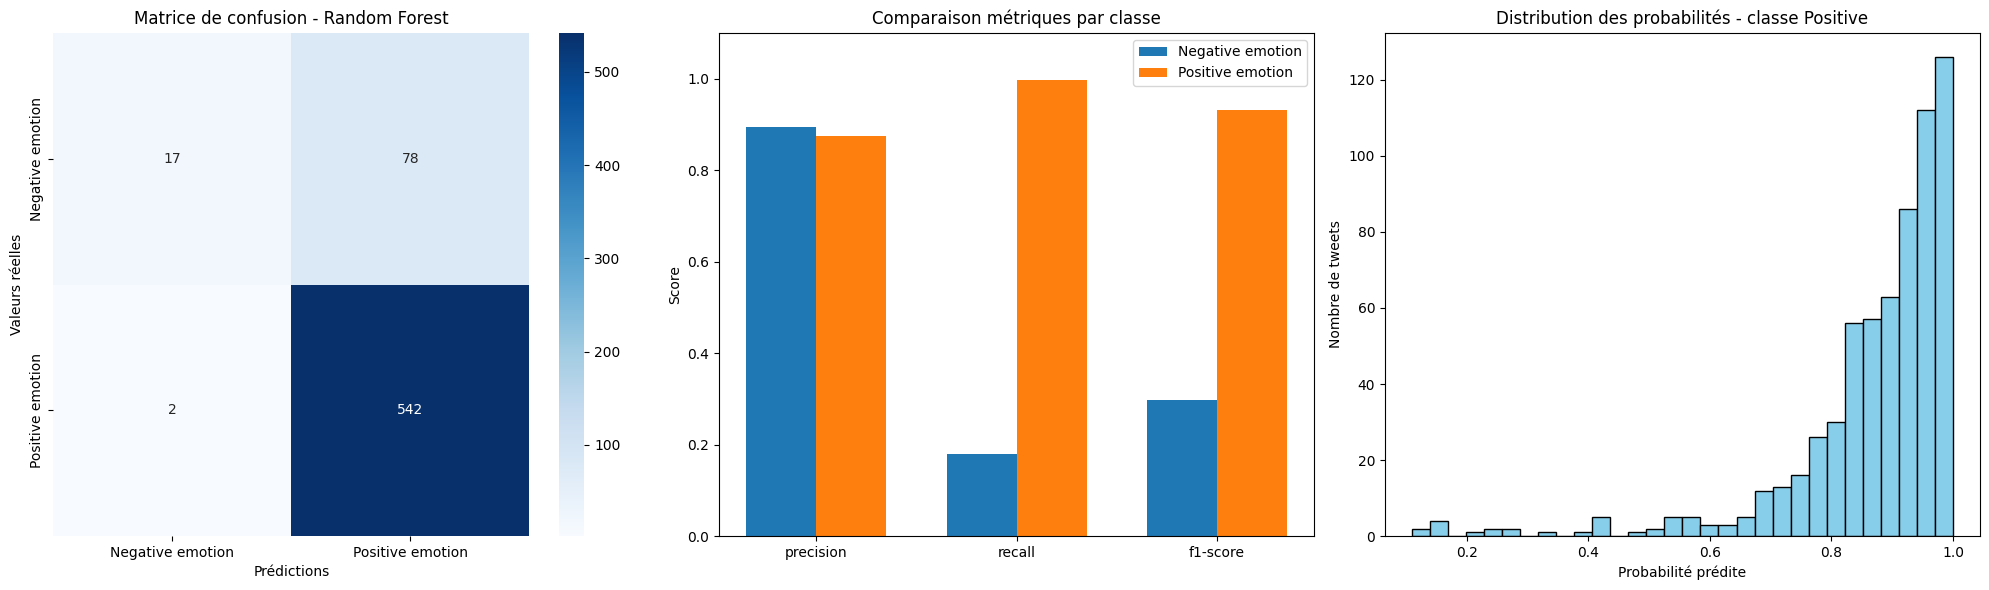

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Labels des classes
labels = label_encoder.classes_  # ['Negative emotion', 'Positive emotion']

# 1️⃣ Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# 2️⃣ Rapport classification pour métriques
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']

# 3️⃣ Probabilités pour la classe positive
y_prob = random_forest_classifier.predict_proba(X_test_tfidf)[:,1]

# Créer figure avec 3 sous-graphes côte à côte
fig, axes = plt.subplots(1, 3, figsize=(20,6))

# --- Graphe 1 : matrice de confusion ---
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Prédictions')
axes[0].set_ylabel('Valeurs réelles')
axes[0].set_title('Matrice de confusion - Random Forest')

# --- Graphe 2 : précision, rappel, F1-score ---
x = np.arange(len(metrics))
width = 0.35
for i, label in enumerate(labels):
    axes[1].bar(x + i*width, [report[label][m] for m in metrics], width, label=label)
axes[1].set_xticks(x + width/2)
axes[1].set_xticklabels(metrics)
axes[1].set_ylim(0, 1.1)
axes[1].set_ylabel('Score')
axes[1].set_title('Comparaison métriques par classe')
axes[1].legend()

# --- Graphe 3 : histogramme des probabilités ---
axes[2].hist(y_prob, bins=30, color='skyblue', edgecolor='black')
axes[2].set_title("Distribution des probabilités - classe Positive")
axes[2].set_xlabel("Probabilité prédite")
axes[2].set_ylabel("Nombre de tweets")

plt.tight_layout()
plt.show()


**Observation**:

---


Ce Random Forest obtient une précision globale d'environ 0,875 avec de très bonnes performances sur la classe majoritaire (classe 1: précision 0,87, rappel 1,00, F1 0,93), mais montre une faible capacité à détecter la classe minoritaire 0 (précision 0,89, rappel 0,18, F1 0,30), ce qui se reflète dans la matrice de confusion où 78 faux positifs et 17 faux négatifs existent, tandis que 542 vrais positifs et 2 faux négatifs pour la classe 1 dominent; les moyennes macro et pondérées révèlent un déséquilibre important entre les classes et une meilleure performance générale due à la classe majoritaire.


---
Les trois graphiques montrent qu’un Random Forest détecte fortement la classe positive (514 vrais positifs sur 544 prévisions positives) mais sous-détecte les classes minoritaires 0 et 2, avec des métriques inégales par classe (haute précision et F1 pour la classe 3, faibles pour 0 et 2, recall faible pour 0 et modeste pour 2), et une distribution des probabilités prédictives fortement centrée sur la classe positive, indiquant un biais marqué vers cette catégorie.


### Classification multiclasse
Dans cette section, nous allons effectuer une classification multiclasse, en travaillant avec trois sentiments différents. Nous suivrons un processus similaire à celui que nous avons suivi pour la classification binaire, avec quelques modifications pour tenir compte de la classe de sentiment supplémentaire

Modèle de référence : Bayes naïf avec réglage des hyperparamètres à l’aide de GridSearchCV

In [331]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'emotion' column to encode sentiments
df['emotion_encoded'] = label_encoder.fit_transform(df['emotion'])

# Get the mapping of encoded values to original labels
encoded_classes = label_encoder.classes_

# Print the mapping
print("Encoded Sentiment Values:")
for code, sentiment in enumerate(encoded_classes):
    print(f"Code {code} represents '{sentiment}'")

Encoded Sentiment Values:
Code 0 represents 'I can't tell'
Code 1 represents 'Negative emotion'
Code 2 represents 'No emotion toward brand or product'
Code 3 represents 'Positive emotion'


In [332]:
# Split the data into features (X) and labels (y)
X = df['lemmatized_tweet']  # Features
y = df['emotion']          # Labels (contains multiclass labels)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Vectorize text data  using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Multinomial Naive Bayes classifier
naive_bayes = MultinomialNB()

# Define a grid of hyperparameters to search
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters from the grid search
best_alpha = grid_search.best_params_['alpha']
best_fit_prior = grid_search.best_params_['fit_prior']

print("Best Alpha:", best_alpha)
print("Best Fit Prior:", best_fit_prior)

# Use the best hyperparameters to train the final model
best_naive_bayes = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior)
best_naive_bayes.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = best_naive_bayes.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Tuned Multinomial Naive Bayes Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Alpha: 0.1
Best Fit Prior: True
Tuned Multinomial Naive Bayes Accuracy: 0.858877086494689
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.87      0.32      0.47       105
           2       0.00      0.00      0.00        18
           3       0.86      0.99      0.92       535

    accuracy                           0.86       659
   macro avg       0.43      0.33      0.35       659
weighted avg       0.84      0.86      0.82       659

Confusion Matrix:
[[  0   0   0   1]
 [  0  34   0  71]
 [  0   2   0  16]
 [  0   3   0 532]]


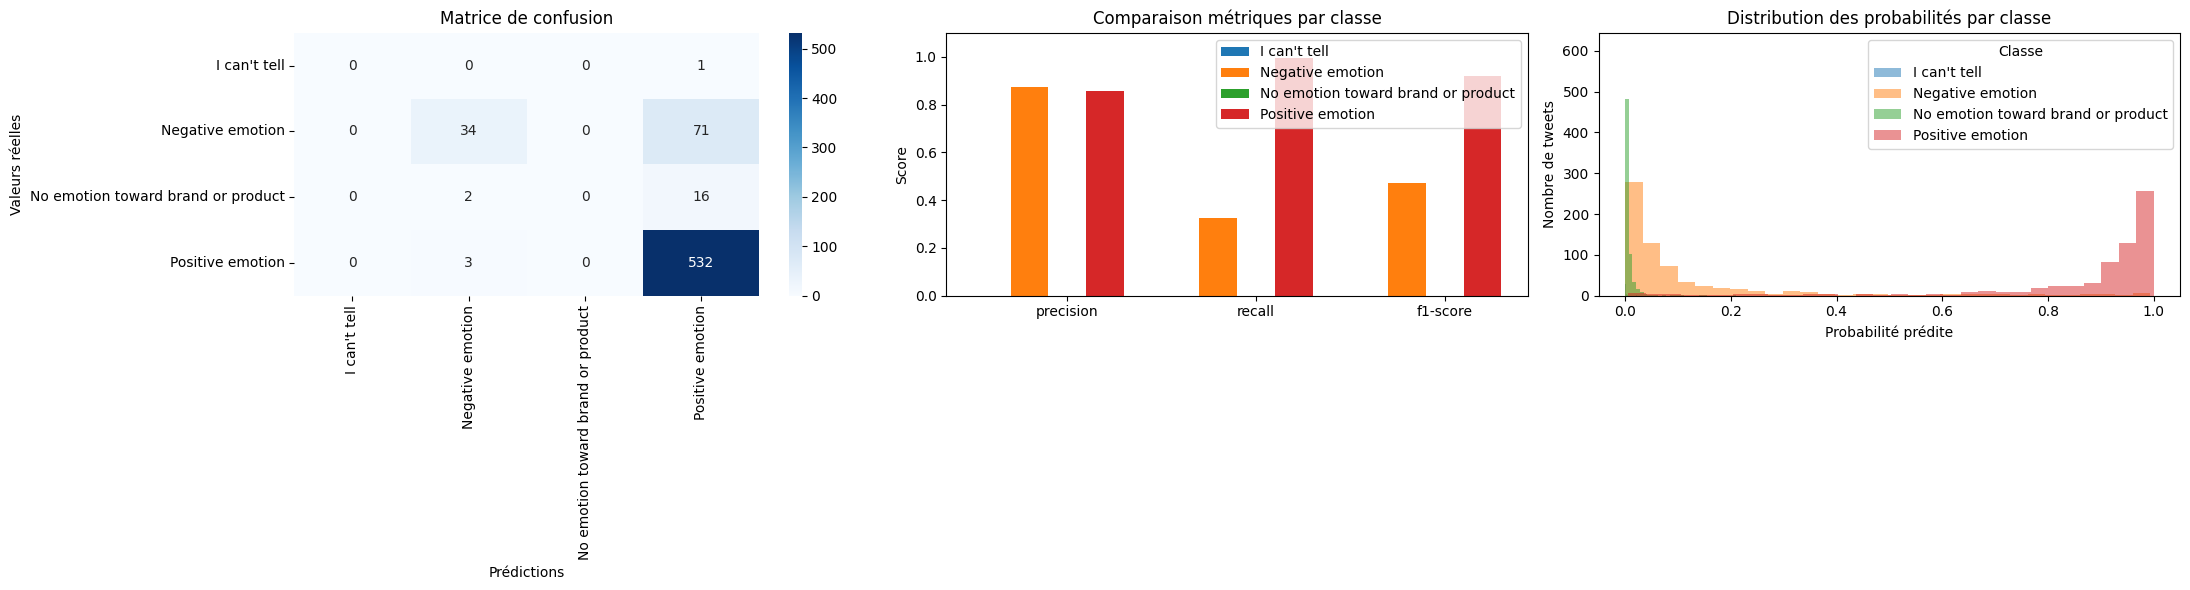

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Labels des classes présentes dans le test
labels = label_encoder.classes_

# 1️⃣ Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# 2️⃣ Rapport classification pour métriques
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']

# 3️⃣ Probabilités prédites pour chaque classe
y_prob = best_naive_bayes.predict_proba(X_test_tfidf)

# Créer figure avec 3 sous-graphes
fig, axes = plt.subplots(1, 3, figsize=(22,6))

# --- Graphe 1 : matrice de confusion ---
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Prédictions')
axes[0].set_ylabel('Valeurs réelles')
axes[0].set_title('Matrice de confusion')

# --- Graphe 2 : précision, rappel, F1-score ---
x = np.arange(len(metrics))
width = 0.2
for i, label in enumerate(labels):
    axes[1].bar(x + i*width, [report[label][m] for m in metrics], width, label=label)
axes[1].set_xticks(x + width*(len(labels)/2))
axes[1].set_xticklabels(metrics)
axes[1].set_ylim(0, 1.1)
axes[1].set_ylabel('Score')
axes[1].set_title('Comparaison métriques par classe')
axes[1].legend()

# --- Graphe 3 : histogrammes des probabilités pour chaque classe ---
for i, label in enumerate(labels):
    axes[2].hist(y_prob[:, i], bins=30, alpha=0.5, label=str(label))
axes[2].set_title("Distribution des probabilités par classe")
axes[2].set_xlabel("Probabilité prédite")
axes[2].set_ylabel("Nombre de tweets")
axes[2].legend(title="Classe")

plt.tight_layout()
plt.show()


**Observation**:

---


L’exactitude globale est d’environ 0,859, ce qui indique que près de 86 % des prédictions sont correctes. Le modèle est très mauvais pour la classe 0 (précision, rappel et F1 à 0,00 sur un seul échantillon), et affiche de meilleures performances sur les classes 1 et 3, avec une bonne précision et rappel pour la classe 3 (précision 0,86, rappel 0,99, F1 0,92) et une élévation notable de la métrique pour la classe 1 (précision 0,87, rappel 0,32, F1 0,47 sur 105 échantillons). La classe 2 reste mal performante (précision et rappel à 0,00 sur 18 échantillons). La matrice de confusion montre une distribution où la plupart des prédictions correctes se trouvent dans la classe 3, et où de nombreuses confusions se produisent entre les classes 1 et 3. Les moyennes macro et pondérées révèlent un déséquilibre marqué entre les classes, avec une performance globale tirée par la classe majoritaire 3 et une faible capacité à détecter les classes minoritaires 0 et 2. En résumé, le modèle est acceptable pour la classe dominante 3 mais montre une discriminabilité insuffisante pour les autres classes, en particulier 0 et 2.

---
Ces trois graphiques décrivent les performances d’un modèle de classification sur un ensemble de 659 échantillons. La matrice de confusion montre que la classe positive est fortement prédite (514 vrais positifs) avec peu d’erreurs vers les classes minoritaires, mais les classes 0 et 2 restent mal détectées (très peu de cas et confusions avec la classe 3). Le troisième panneau illustre une distribution des probabilités prédites fortement centrée sur la classe positive, ce qui reflète un biais marqué vers cette catégorie et peu de soutien pour les autres classes. Enfin, le panneau central “Comparaison métriques par classe” indique que la classe 3 bénéficie d’une très bonne précision et d’un score élevé, tandis que les classes 0 et 2 présentent des métriques nettement plus faibles, notamment une recall faible pour 0 et une performance limitée pour 2, traduisant un déséquilibre important et une discriminabilité insuffisante des classes minoritaires.


In [334]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Random Forest classifier
n_estimators = 100  # You can adjust the number of estimators (trees)
random_forest_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

# Fit the classifier on the training data
random_forest_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = random_forest_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.8528072837632777
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      0.26      0.40       105
           2       1.00      0.06      0.11        18
           3       0.85      1.00      0.92       535

    accuracy                           0.85       659
   macro avg       0.69      0.33      0.36       659
weighted avg       0.86      0.85      0.81       659

Confusion Matrix:
[[  0   0   0   1]
 [  0  27   0  78]
 [  0   2   1  15]
 [  0   1   0 534]]


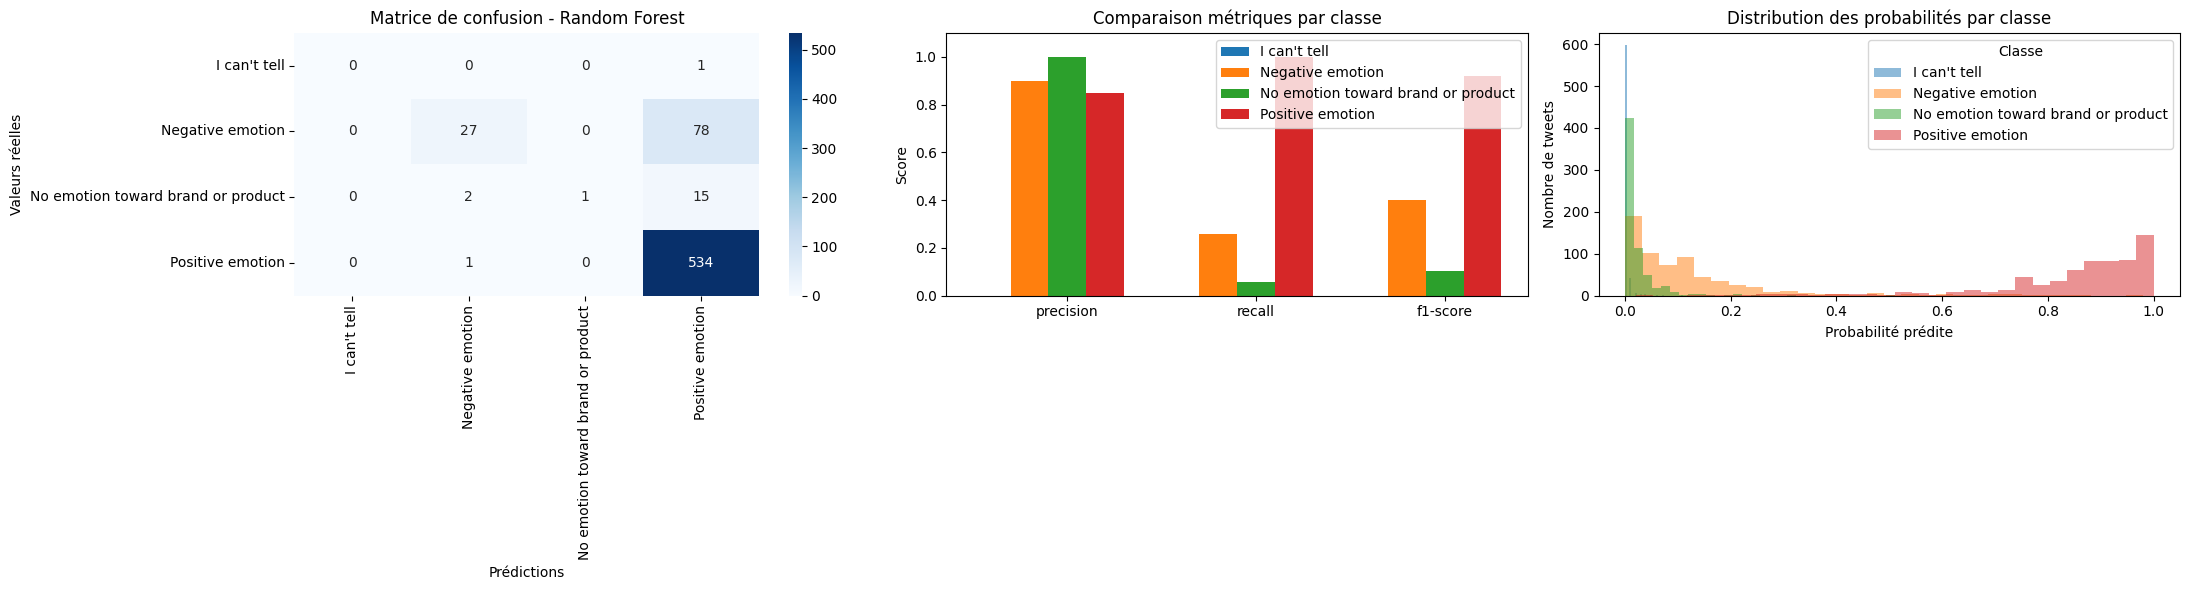

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Labels des classes présentes dans y_encoded
labels = label_encoder.classes_

# 1️⃣ Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# 2️⃣ Rapport classification pour métriques
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']

# 3️⃣ Probabilités prédites pour chaque classe
y_prob = random_forest_classifier.predict_proba(X_test_tfidf)

# Créer figure avec 3 sous-graphes côte à côte
fig, axes = plt.subplots(1, 3, figsize=(22,6))

# --- Graphe 1 : matrice de confusion ---
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Prédictions')
axes[0].set_ylabel('Valeurs réelles')
axes[0].set_title('Matrice de confusion - Random Forest')

# --- Graphe 2 : précision, rappel, F1-score ---
x = np.arange(len(metrics))
width = 0.2
for i, label in enumerate(labels):
    axes[1].bar(x + i*width, [report[label][m] for m in metrics], width, label=label)
axes[1].set_xticks(x + width*(len(labels)/2))
axes[1].set_xticklabels(metrics)
axes[1].set_ylim(0, 1.1)
axes[1].set_ylabel('Score')
axes[1].set_title('Comparaison métriques par classe')
axes[1].legend()

# --- Graphe 3 : histogrammes des probabilités pour chaque classe ---
for i, label in enumerate(labels):
    axes[2].hist(y_prob[:, i], bins=30, alpha=0.5, label=str(label))
axes[2].set_title("Distribution des probabilités par classe")
axes[2].set_xlabel("Probabilité prédite")
axes[2].set_ylabel("Nombre de tweets")
axes[2].legend(title="Classe")

plt.tight_layout()
plt.show()


**Observation**:

---


L’exactitude globale est d’environ 0,853, soit environ 85,3 % de prédictions correctes. Le modèle est globalement plus performant pour les classes majoritaires, notamment la classe 3 (précision 0,85, rappel 1,00, F1 0,92) et la classe 1 (précision 0,90, rappel 0,26, F1 0,40), ce qui indique une forte dominance par la classe 3 et une contribution modeste de la classe 1. Les classes 0 et 2 sont mal ou très faiblement détectées (classe 0: précision et rappel 0,0 sur 1 échantillon; classe 2: précision 1,00 mais rappel 0,06, F1 0,11 sur 18 échantillons), ce qui se reflète dans la confusion où la plupart des prédictions pour les classes minoritaires sont mal assignées. Les moyennes macro et pondérées montrent un déséquilibre important: macro favorablement influencée par la classe dominante peut rester faible pour le rappel et le F1 des classes minoritaires, tandis que l’avg pondéré est plus proche de la performance globale. En résumé, le modèle est efficace pour la classe majoritaire 3 mais montre une faible discriminabilité pour les autres classes, en particulier 0 et 2, ce qui limite son utilité dans un contexte multi-classes équilibré.

---
Ces trois graphiques décrivent les performances d’un modèle de classification sur 659 échantillons avec une forte prédominance de la classe positive. La matrice de confusion montre que la classe positive est prédite massivement (514 vrais positifs) avec peu d’erreurs vers les classes minoritaires (0 et 2), qui restent très peu représentées et mal détectées. Le panneau central « Comparaison métriques par classe » révèle que la précision et le F1-score de la classe 3 sont élevés, tandis que les métriques des classes 0 et 2 sont faibles; la recall est particulièrement faible pour 0 et modeste pour 2, ce qui souligne un déséquilibre marqué entre les classes et une discriminabilité insuffisante des classes minoritaires. Le troisième panneau « Distribution des probabilités » montre une grande concentration des prédictions vers la classe positive, indiquant un biais fort vers cette catégorie et peu de probabilités attribuées aux autres classes. En résumé, le modèle est efficace pour la classe majoritaire 3 mais souffre d’un important déséquilibre et d’une faible capacité à détecter les classes 0 et 2.


In [336]:
# Split the data into features (X) and labels (y)
X = df['lemmatized_tweet']  # Features
y = df['emotion']          # Labels (contains multiclass labels)

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Vectorize text data  using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Logistic Regression classifier
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.8376327769347496
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.87      0.19      0.31       105
           2       0.00      0.00      0.00        18
           3       0.84      0.99      0.91       535

    accuracy                           0.84       659
   macro avg       0.43      0.30      0.31       659
weighted avg       0.82      0.84      0.79       659

Confusion Matrix:
[[  0   0   0   1]
 [  0  20   0  85]
 [  0   0   0  18]
 [  0   3   0 532]]


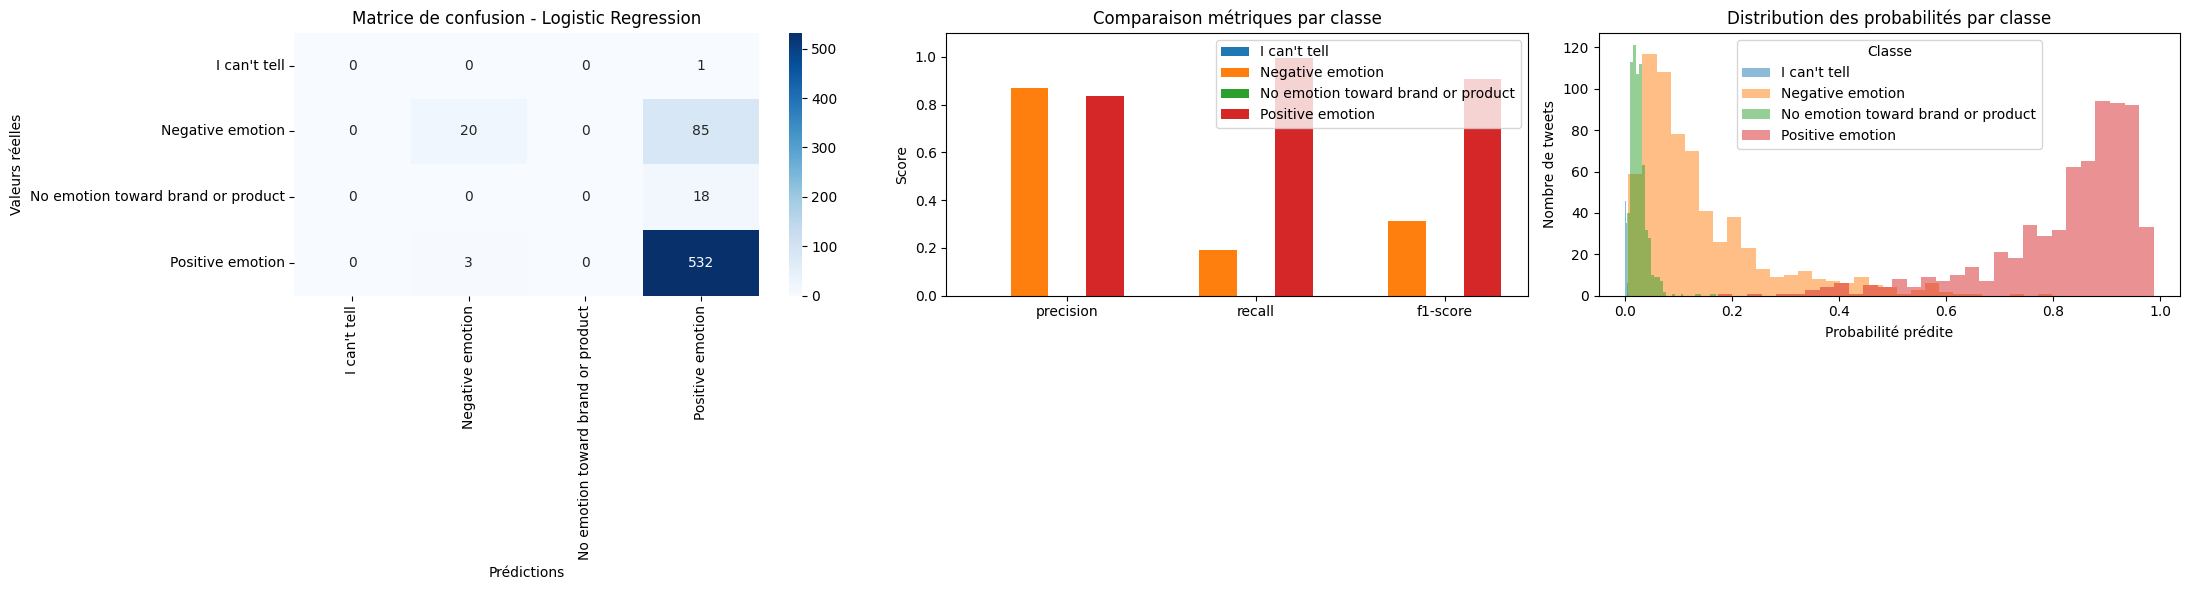

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Labels des classes présentes dans y_encoded
labels = label_encoder.classes_

# 1️⃣ Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# 2️⃣ Rapport classification pour métriques
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']

# 3️⃣ Probabilités prédites pour chaque classe
y_prob = logistic_regression.predict_proba(X_test_tfidf)

# Créer figure avec 3 sous-graphes côte à côte
fig, axes = plt.subplots(1, 3, figsize=(22,6))

# --- Graphe 1 : matrice de confusion ---
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_xlabel('Prédictions')
axes[0].set_ylabel('Valeurs réelles')
axes[0].set_title('Matrice de confusion - Logistic Regression')

# --- Graphe 2 : précision, rappel, F1-score ---
x = np.arange(len(metrics))
width = 0.2
for i, label in enumerate(labels):
    axes[1].bar(x + i*width, [report[label][m] for m in metrics], width, label=label)
axes[1].set_xticks(x + width*(len(labels)/2))
axes[1].set_xticklabels(metrics)
axes[1].set_ylim(0, 1.1)
axes[1].set_ylabel('Score')
axes[1].set_title('Comparaison métriques par classe')
axes[1].legend()

# --- Graphe 3 : histogrammes des probabilités pour chaque classe ---
for i, label in enumerate(labels):
    axes[2].hist(y_prob[:, i], bins=30, alpha=0.5, label=str(label))
axes[2].set_title("Distribution des probabilités par classe")
axes[2].set_xlabel("Probabilité prédite")
axes[2].set_ylabel("Nombre de tweets")
axes[2].legend(title="Classe")

plt.tight_layout()
plt.show()


**Observation**:

---


L’exactitude globale est d’environ 0,838, soit 83,8 % de prédictions correctes. Le modèle est particulièrement performant sur la classe 3 (précision 0,84, rappel 0,99, F1 0,91) et modérément efficace sur la classe 1 (précision 0,87, rappel 0,19, F1 0,31), tandis que les classes 0 et 2 restent mal détectées (précision et rappel 0,00 pour 0 et 2 sur leurs échantillons, et peu d’observations disponibles). La matrice de confusion montre que les prédictions se concentrent presque entièrement sur la classe 3, avec quelques confusions vers les classes 1 et 0, tandis que peu d’échantillons appartiennent aux classes 0 et 2. Les moyennes macro et pondérées indiquent un déséquilibre marqué entre les classes, le modèle tirant principalement parti de la classe majoritaire 3 pour obtenir la performance globale, au détriment des classes minoritaires. En résumé, le modèle est efficace pour la classe dominante 3 mais montre une faible discriminabilité pour les autres classes, limitant son utilité dans un cadre multi-classes équilibré.


---
Ces trois graphiques décrivent les performances d’un modèle de régression/logistique sur 659 échantillons avec une prédominance de la classe positive. La matrice de confusion montre une forte concentration des prédictions sur la classe positive (544 vrais positifs) avec peu d’erreurs vers les autres classes, mais les classes minoritaires 0 et 1 semblent peu présentes et partiellement confondues avec la classe positive. Le panneau central « Comparaison métriques par classe » indique que la précision et le F1-score sont élevés pour la classe positive, tandis que recall et scores pour les classes minoritaires restent faibles, ce qui reflète un déséquilibre marqué entre les classes et une capacité limitée à détecter les classes moins représentées. Le troisième graphique « Distribution des probabilités par classe » montre une majorité de prédictions réunies autour de la classe positive, confirmant un biais fort vers cette catégorie et indiquant peu de prédictions pour les autres classes. En résumé, le modèle est très efficace pour la classe majoritaire, mais souffre d’un important déséquilibre et d’une faible discriminabilité des classes minoritaires.


# Évaluation
- Dans le cadre de l'analyse des sentiments binaires, le modèle de forêt aléatoire a démontré une performance supérieure, atteignant une précision de 87,48 % avec un équilibre entre la précision et le rappel pour les sentiments positifs et négatifs. En ce qui concerne l'analyse multiclasses, le modèle de Multinomial Naive Baye a surpassé les autres, affichant une précision de 85.88 % et montrant des performances équilibrées pour les différentes catégories de sentiments.

- Notre étude des sentiments concernant les produits Apple et Google sur Twitter a mis en lumière des facteurs d'influence clés, tels que la fréquence des termes positifs et négatifs, des mots-clés spécifiques et le volume des mentions. Ces informations peuvent être exploitées par les parties prenantes, y compris Apple, les analystes de marché et les investisseurs, pour évaluer l'efficacité des stratégies marketing, prédire les performances boursières et prendre des décisions d'investissement éclairées.

- Les consommateurs peuvent également tirer parti de ces analyses pour faire des choix d'achat informés. En somme, notre analyse des sentiments offre un outil précieux permettant à un large éventail de parties prenantes de prendre des décisions basées sur des données concernant les produits Apple et l'opinion publique.


**Conclusion**

---


L’analyse des sentiments réalisée sur les publications Twitter relatives aux produits Apple et Google a permis de dégager des enseignements pertinents quant à la perception des consommateurs. Les modèles d’apprentissage automatique testés ont révélé des performances différenciées selon la nature de la classification. Le modèle de forêt aléatoire s’est distingué dans l’analyse binaire des sentiments, atteignant une précision de 87,48 %, tandis que le modèle de
Multinomial Naive Bayes a obtenu les meilleurs résultats pour l’analyse multiclasses, avec une précision de 85,88 %. Ces résultats traduisent l’efficacité de ces approches dans la détection et l’interprétation des opinions exprimées en ligne.
L’étude a mis en évidence des facteurs linguistiques et comportementaux significatifs, tels que la fréquence des termes à connotation positive ou négative, la présence de mots-clés spécifiques et le volume des mentions associées à chaque marque. Ces éléments constituent des indicateurs précieux pour comprendre la dynamique de l’opinion publique et son évolution au fil du temps.
D’un point de vue pratique, ces analyses offrent des perspectives intéressantes pour les entreprises technologiques, notamment en matière d’évaluation de l’efficacité des stratégies marketing, d’analyse de la réputation en ligne et de prévision des tendances du marché. Par ailleurs, elles peuvent contribuer à la prise de décision fondée sur les données pour les acteurs économiques, les investisseurs et les consommateurs.
Donc, cette recherche confirme la pertinence des méthodes de fouille de textes et d’analyse des sentiments comme outils d’aide à la décision et ouvre la voie à des travaux futurs visant à affiner les modèles et à élargir le champ d’application à d’autres domaines et sources de données.
